## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Please read the instructions carefully before starting the project.**

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

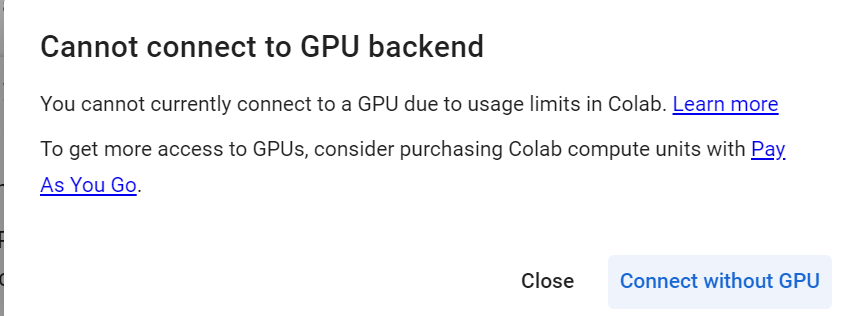

## **Installing and Importing Necessary Libraries**

In [ ]:
# installing the sentence-transformers and gensim libraries for word embeddings
!pip install -U sentence-transformers gensim transformers tqdm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 21.8 MB/s eta 0:00:00


In [3]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 9.1 MB/s eta 0:00:00


In [4]:
import sklearn

In [5]:
# To manipulate and analyze data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# To used time-related functions
import time

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# to create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# to split data into train and test sets
from sklearn.model_selection import train_test_split

# to build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# to compute metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# To tune different models
from sklearn.model_selection import GridSearchCV

# To parse JSON data
import json

# to load transformer models
from sentence_transformers import SentenceTransformer
from transformers import T5Tokenizer, T5ForConditionalGeneration, pipeline


# To build, tune, and evaluate ML models
# from sklearn.ensemble import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# To load/create word embeddings
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# To work with transformer models
import torch
from sentence_transformers import SentenceTransformer

# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To implement progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


## **Loading the dataset**

In [6]:
# # uncomment and run the following code if Google Colab is being used and the dataset is in Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
stock_news = pd.read_csv("/content/drive/MyDrive/AIML/NLPProject/stock_news.csv")

In [8]:
#Creating a copy of the dataset
stock = stock_news.copy()

## **Data Overview**

In [9]:
print(stock.shape)

(349, 8)


*Dataset is having 349 rows and 8 columns*

In [10]:
stock.head()

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1


In [11]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    349 non-null    object 
 1   News    349 non-null    object 
 2   Open    349 non-null    float64
 3   High    349 non-null    float64
 4   Low     349 non-null    float64
 5   Close   349 non-null    float64
 6   Volume  349 non-null    int64  
 7   Label   349 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 21.9+ KB


**Observations**

*   Out of 7 columns - 2 columns are related to object
*   Data column should be coverted to Date format





In [12]:
stock.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,349.0,4.622923e+01,6.442817e+00,3.756750e+01,4.174000e+01,4.597500e+01,5.070750e+01,6.681750e+01
High,349.0,4.670046e+01,6.507321e+00,3.781750e+01,4.224500e+01,4.602500e+01,5.085000e+01,6.706250e+01
Low,349.0,4.574539e+01,6.391976e+00,3.730500e+01,4.148250e+01,4.564000e+01,4.977750e+01,6.586250e+01
Close,349.0,4.492632e+01,6.398338e+00,3.625413e+01,4.024691e+01,4.459692e+01,4.911079e+01,6.480523e+01
Volume,349.0,1.289482e+08,4.317031e+07,4.544800e+07,1.032720e+08,1.156272e+08,1.511252e+08,2.444392e+08
Label,349.0,-5.444126e-02,7.151192e-01,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [13]:
stock['Date'] = pd.to_datetime(stock['Date'])  # to convert the 'Date' column in the 'stock' DataFrame to datetime format.

In [14]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    349 non-null    datetime64[ns]
 1   News    349 non-null    object        
 2   Open    349 non-null    float64       
 3   High    349 non-null    float64       
 4   Low     349 non-null    float64       
 5   Close   349 non-null    float64       
 6   Volume  349 non-null    int64         
 7   Label   349 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 21.9+ KB


## Checking Missing value

In [15]:
stock.isnull().sum()

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


**Observation**
- We don't have any missing values

## Checking Duplicate Values

In [16]:
# checking for duplicate values
stock.duplicated().sum()

0

**Observation**:
- No dublicate values in the dataset

## **Exploratory Data Analysis**

### Univariate Analysis

* Distribution of individual variables
* Compute and check the distribution of the length of news content

**Utility Functions**

In [17]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [18]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [19]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [20]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    color = ['blue', 'red', 'purple', 'black']
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5),color=color)
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

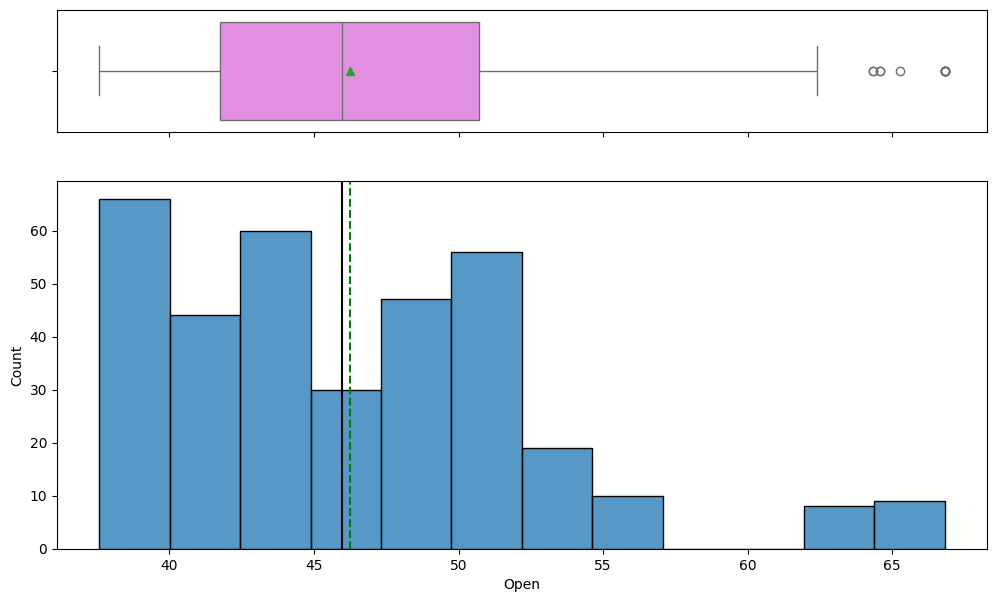

In [21]:
histogram_boxplot(stock, "Open")

**Observations**
- Slightly left screwed distribution
- Maximum stock are opned between > ~38 to < ~52; we have limited stock more than ~55

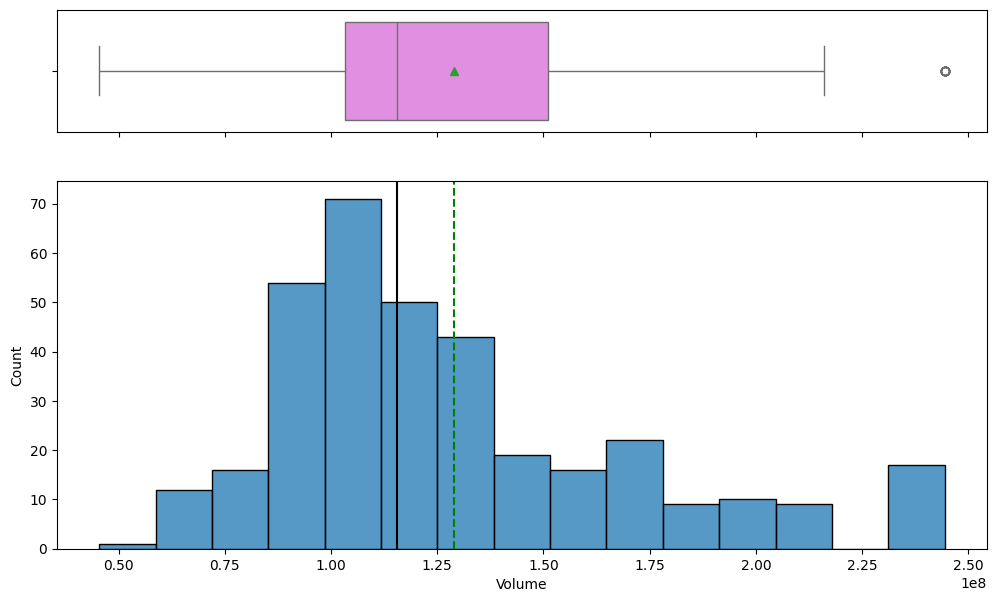

In [22]:
histogram_boxplot(stock, "Volume")

**Observations**
- Slighty left screwed distibution & we have some outliers in the data

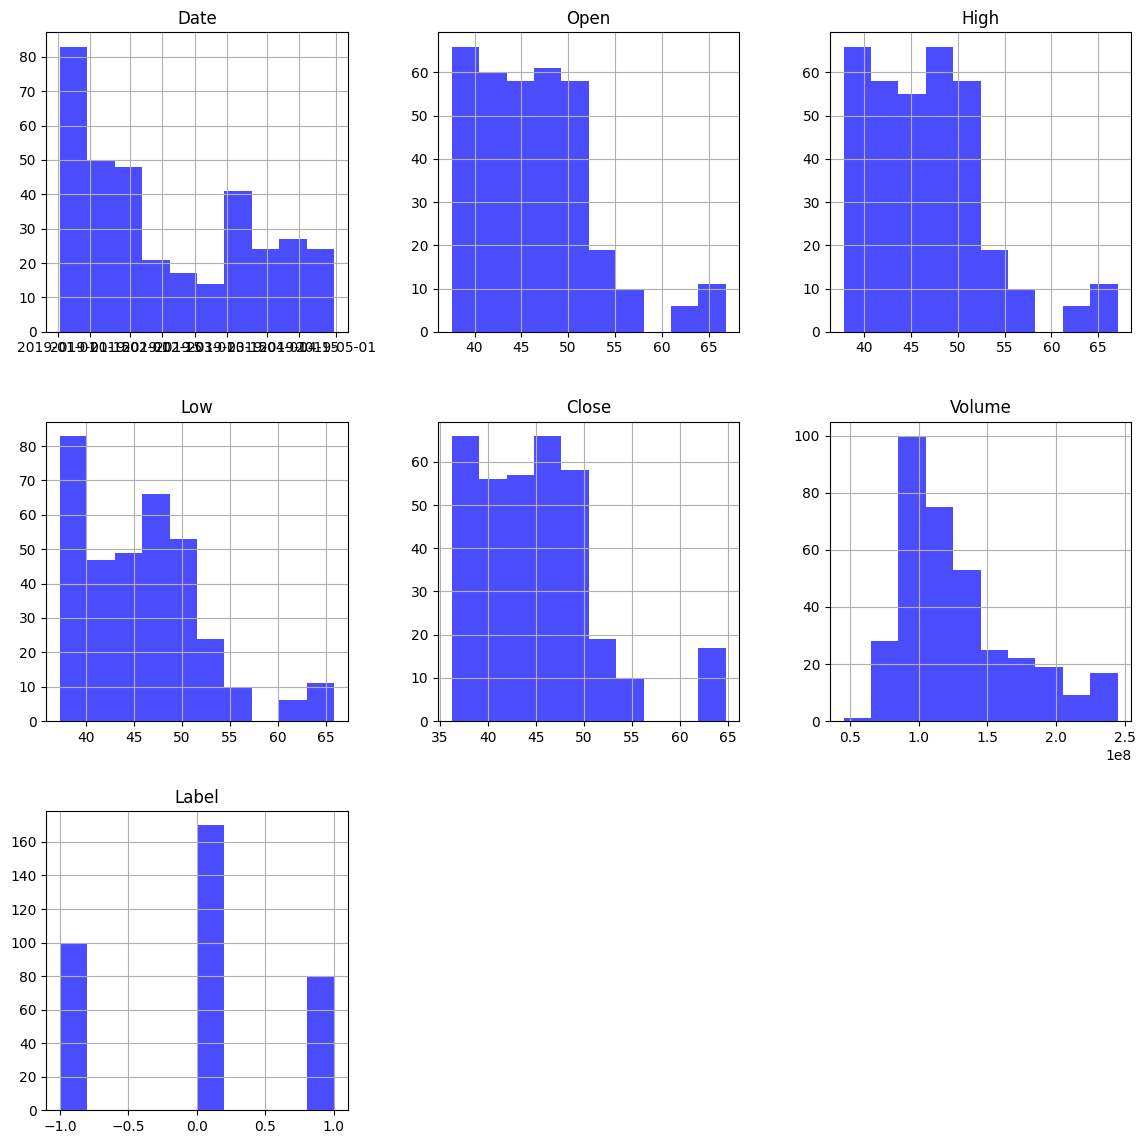

In [23]:
# creating histograms for whole dataframe
stock.hist(figsize=(14, 14), color ='blue', alpha = 0.7)
plt.show()

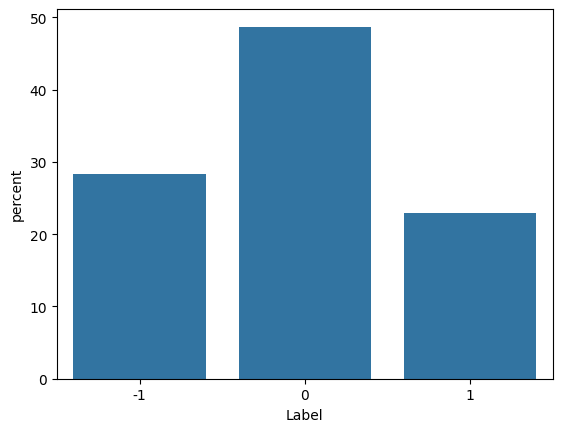

In [24]:
#|: "Distribution of the target variable by species name"
sns.countplot(data=stock, x="Label", stat="percent");
plt.show();

**Observation**
- Positive and Negative are near equal amount of data
- Netrual data is double of Postive / Negative data

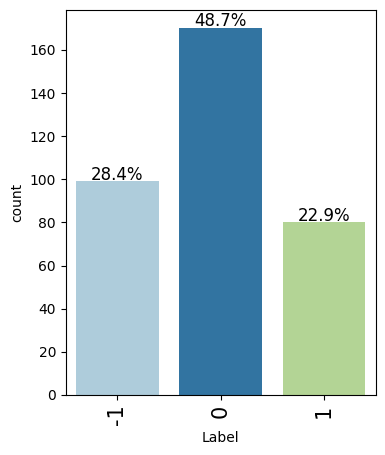

In [25]:
labeled_barplot(stock,"Label",perc=True)

**Observation**
- Netural % is near equal to addition of Postive and Negative %

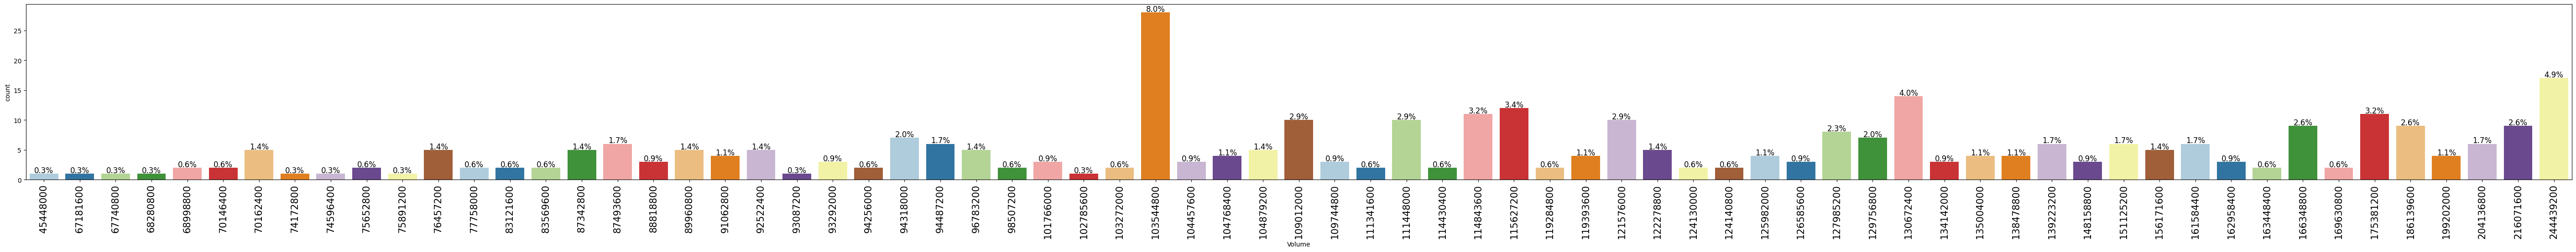

In [26]:
labeled_barplot(stock,"Volume",perc=True)

<Figure size 1500x1500 with 0 Axes>

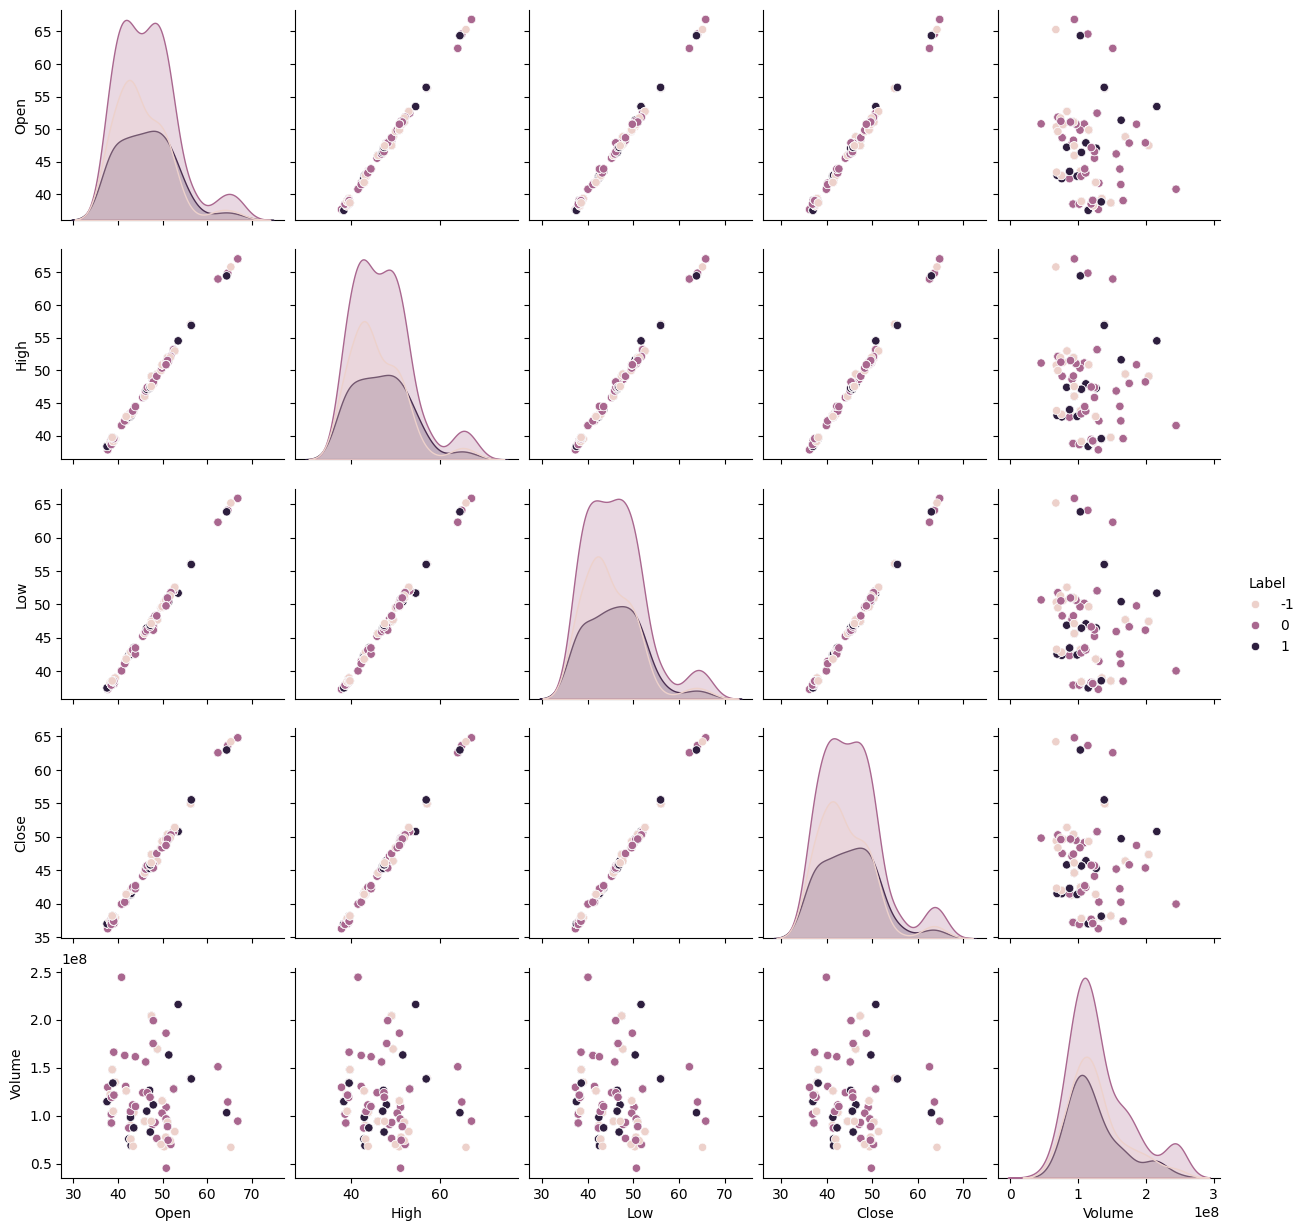

In [27]:
plt.figure(figsize=(15,15))
sns.pairplot(stock, hue="Label");
plt.show()

### Bivariate Analysis

* Correlation
* Sentiment Polarity vs Price
* Date vs Price

**Note**: The above points are listed to provide guidance on how to approach bivariate analysis. Analysis has to be done beyond the above listed points to get maximum scores.

In [28]:
#Calculating the total number of words present in the news content.
stock['news_len'] = stock['News'].apply(lambda x: len(x.split(' ')))
print (stock['news_len'].describe())
print(stock['news_len'].info())


count    349.000000
mean      49.312321
std        5.727770
min       19.000000
25%       46.000000
50%       50.000000
75%       53.000000
max       61.000000
Name: news_len, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 349 entries, 0 to 348
Series name: news_len
Non-Null Count  Dtype
--------------  -----
349 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB
None


**Observation**
- News length is between 19 to 61
- Most of the news are in between 46 (25%) to 53 (75%)

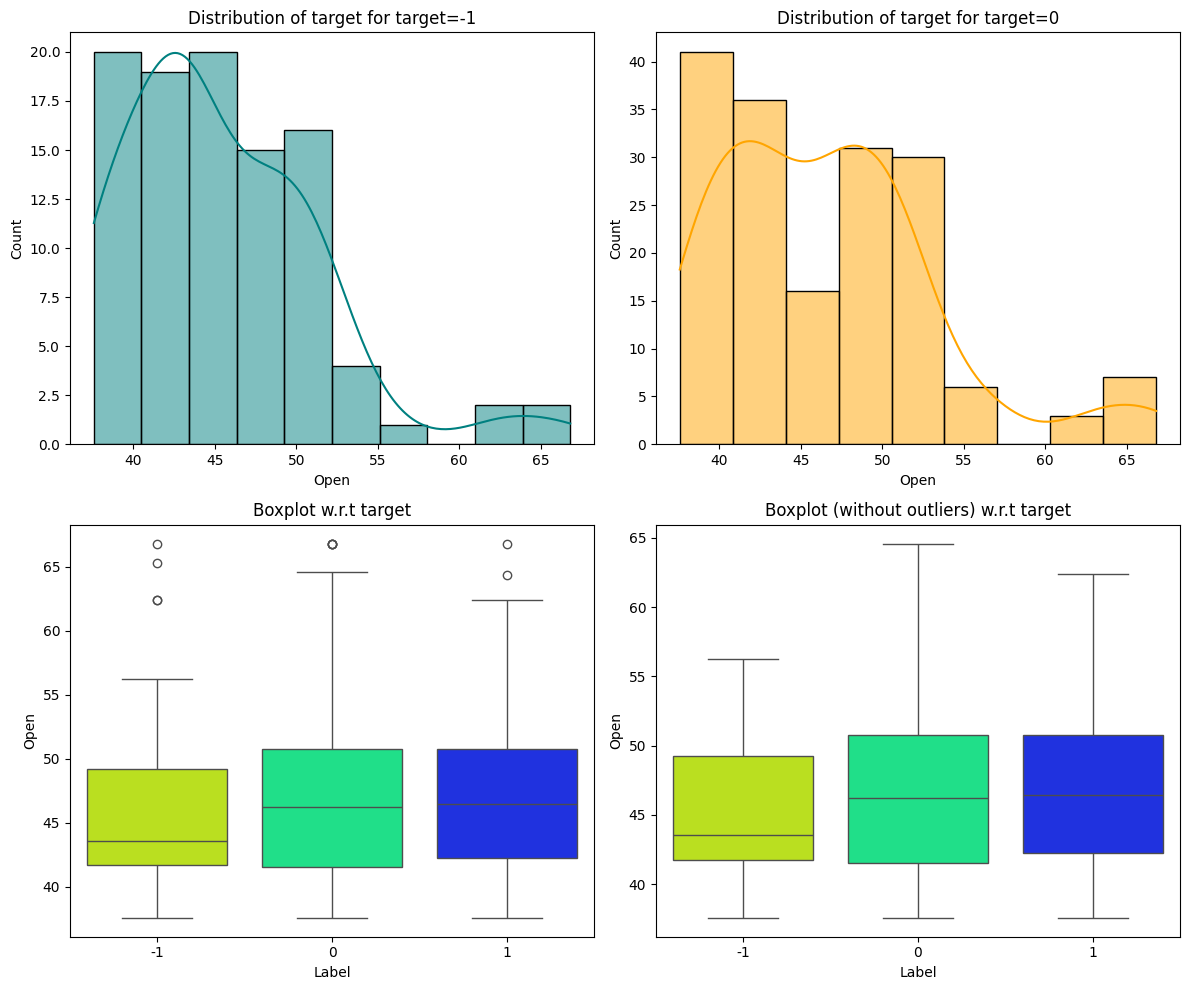

In [29]:
distribution_plot_wrt_target(stock, "Open", "Label")

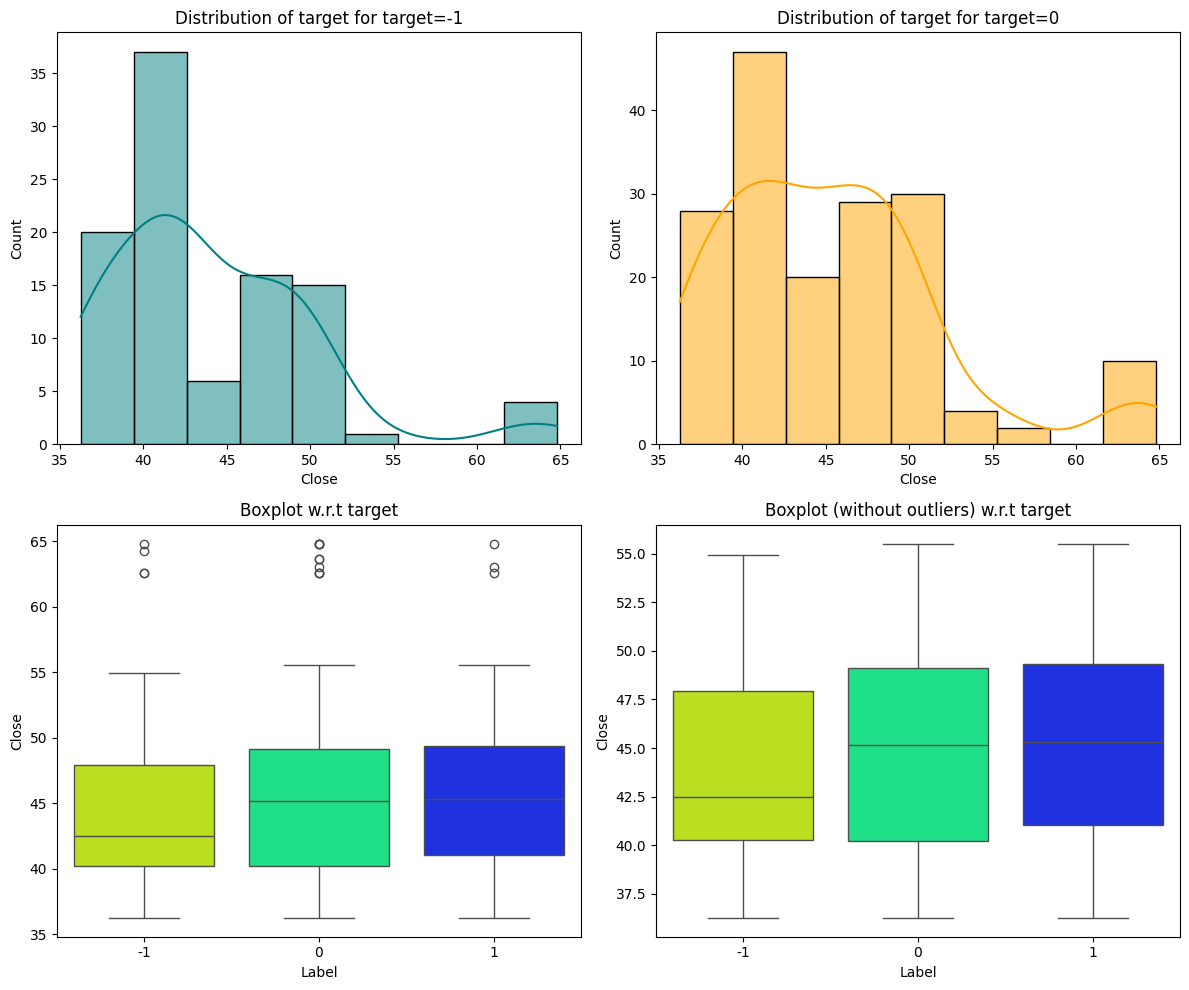

In [30]:
distribution_plot_wrt_target(stock, "Close", "Label")

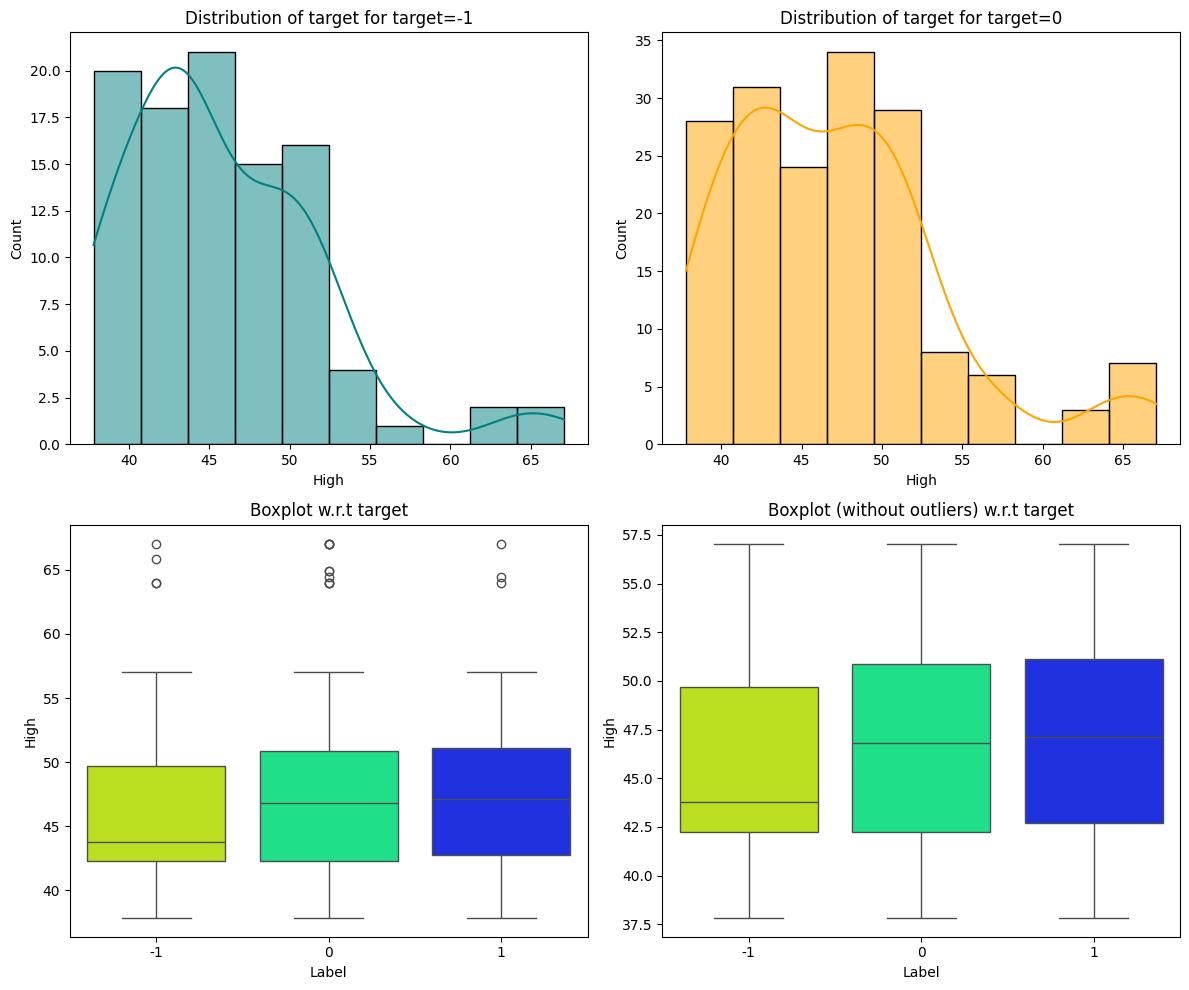

In [31]:
distribution_plot_wrt_target(stock, "High", "Label")

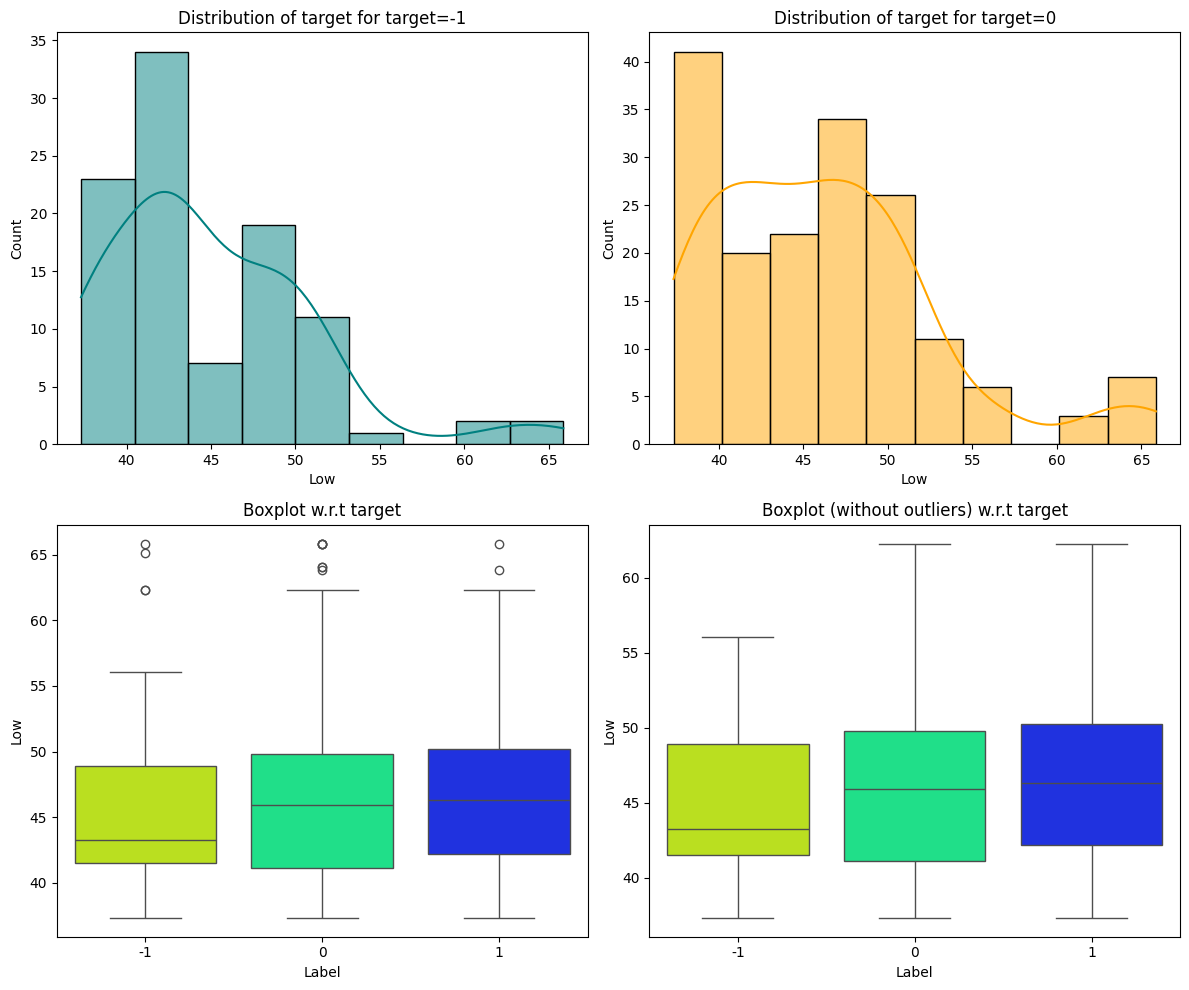

In [32]:
distribution_plot_wrt_target(stock, "Low", "Label")

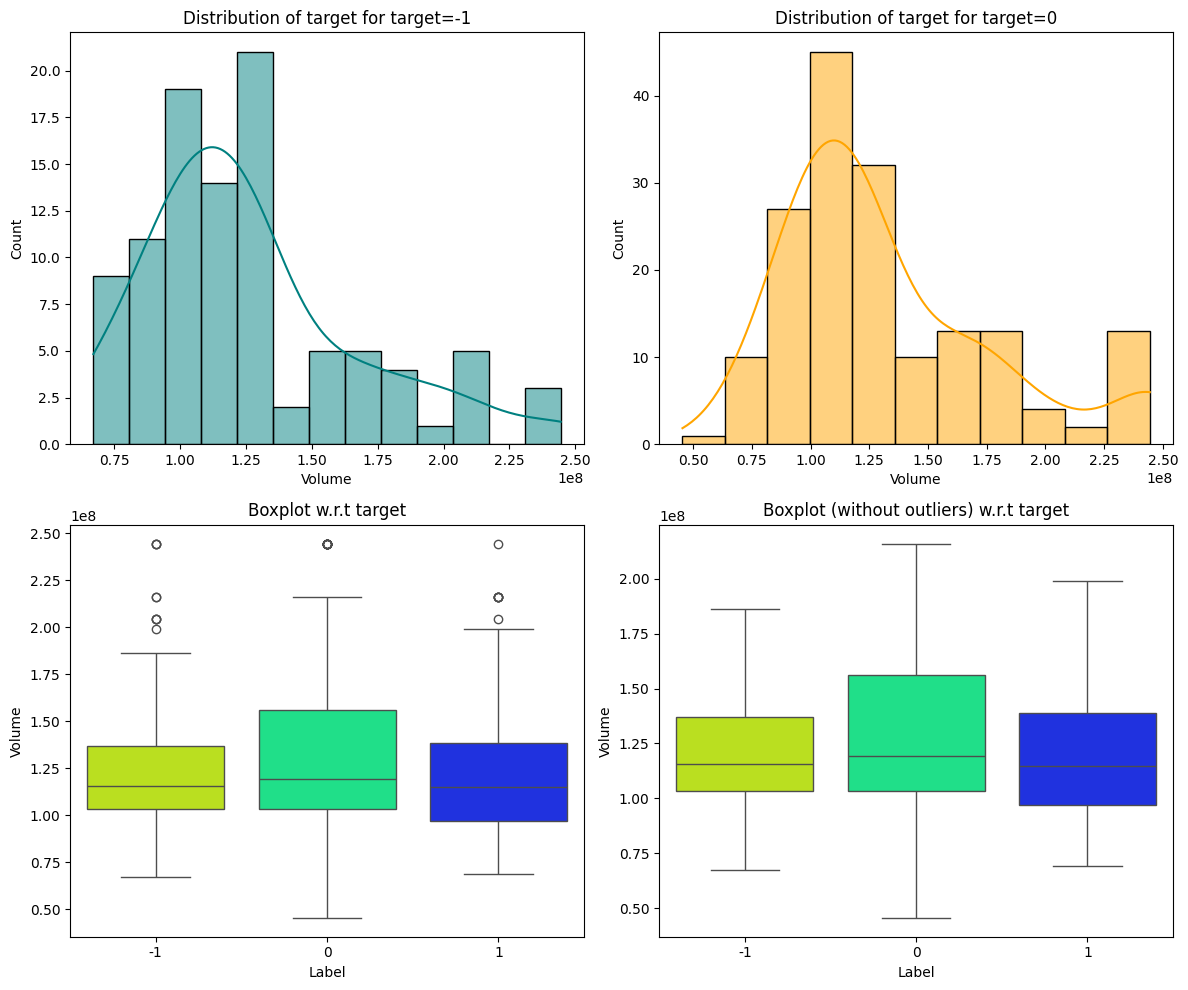

In [33]:
distribution_plot_wrt_target(stock, "Volume", "Label")

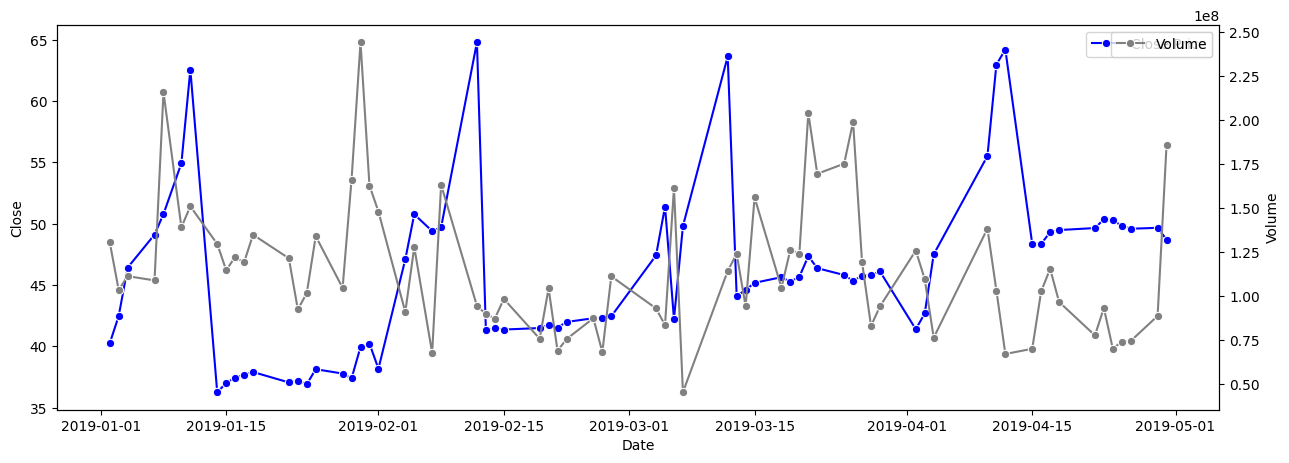

In [34]:
stock_daily = stock.groupby('Date').agg(
    {
        'Open': 'mean',
        'High': 'mean',
        'Low': 'mean',
        'Close': 'mean',
        'Volume': 'mean',
    }
).reset_index()  # Group the 'stocks' DataFrame by the 'Date' column

stock_daily.set_index('Date', inplace=True)
stock_daily.head()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15,5))

# Lineplot on primary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Close', ax=ax1, color='blue', marker='o', label='Close Price')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Lineplot on secondary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Volume', ax=ax2, color='gray', marker='o', label='Volume')

ax1.legend(bbox_to_anchor=(1,1));

## **Data Preprocessing**

In [35]:
stock.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,349,2019-02-16 16:05:30.085959936,2019-01-02 00:00:00,2019-01-14 00:00:00,2019-02-05 00:00:00,2019-03-22 00:00:00,2019-04-30 00:00:00,NaN
Open,349.0,46.229233,37.567501,41.740002,45.974998,50.7075,66.817497,6.442817
High,349.0,46.700458,37.817501,42.244999,46.025002,50.849998,67.0625,6.507321
Low,349.0,45.745394,37.305,41.482498,45.639999,49.7775,65.862503,6.391976
Close,349.0,44.926317,36.254131,40.246914,44.596924,49.11079,64.805229,6.398338
Volume,349.0,128948236.103152,45448000.0,103272000.0,115627200.0,151125200.0,244439200.0,43170314.918964
Label,349.0,-0.054441,-1.0,-1.0,0.0,0.0,1.0,0.715119
news_len,349.0,49.312321,19.0,46.0,50.0,53.0,61.0,5.72777


In [36]:
stock = stock.drop("news_len",axis=1).reset_index()

## **Word Embeddings**

**Text Processing**

**Processing Details**
- Remove spefical characters
- Remove lower case characters
- Remove "Stopwords"
- Process Stemming

In [37]:
# defining a function to remove special characters
def remove_special_characters(text):
    # Defining the regex pattern to match non-alphanumeric characters
    pattern = '[^A-Za-z0-9]+'

    # Finding the specified pattern and replacing non-alphanumeric characters with a blank string
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text

In [38]:
# Applying the function to remove special characters
stock['Cleaned_News'] = stock['News'].apply(remove_special_characters)

- Removed all special characters and white spaces - Created new column "Cleaned News"

In [39]:
# checking a couple of instances of cleaned data
stock.loc[0:3, ['News','Cleaned_News']]

,News,Cleaned_News
0,The tech sector experienced a significant dec...,The tech sector experienced a significant dec...
1,Apple lowered its fiscal Q1 revenue guidance ...,Apple lowered its fiscal Q1 revenue guidance ...
2,Apple cut its fiscal first quarter revenue fo...,Apple cut its fiscal first quarter revenue fo...
3,This news article reports that yields on long...,This news article reports that yields on long...


In [40]:
# changing the case of the text data to lower case
stock['Cleaned_News'] = stock['Cleaned_News'].str.lower()

- Converted into lower cases for all characters

In [41]:
# checking a couple of instances of cleaned data
stock.loc[0:3, ['News','Cleaned_News']]

,News,Cleaned_News
0,The tech sector experienced a significant dec...,the tech sector experienced a significant dec...
1,Apple lowered its fiscal Q1 revenue guidance ...,apple lowered its fiscal q1 revenue guidance ...
2,Apple cut its fiscal first quarter revenue fo...,apple cut its fiscal first quarter revenue fo...
3,This news article reports that yields on long...,this news article reports that yields on long...


In [42]:
# removing extra whitespaces from the text
stock['Cleaned_News'] = stock['Cleaned_News'].str.strip()

In [43]:
# checking a couple of instances of cleaned data
stock.loc[0:3, ['News','Cleaned_News']]

,News,Cleaned_News
0,The tech sector experienced a significant dec...,the tech sector experienced a significant decl...
1,Apple lowered its fiscal Q1 revenue guidance ...,apple lowered its fiscal q1 revenue guidance t...
2,Apple cut its fiscal first quarter revenue fo...,apple cut its fiscal first quarter revenue for...
3,This news article reports that yields on long...,this news article reports that yields on long ...


**Removing Spotwords and Stemming**

In [44]:
# defining a function to remove stop words using the NLTK library
def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])

    return new_text

In [45]:
# Applying the function to remove stop words using the NLTK library
stock['Cleaned_News_without_stopwords'] = stock['Cleaned_News'].apply(remove_stopwords)

In [46]:
# checking a couple of instances of cleaned data
stock.loc[0:3, ['News','Cleaned_News', 'Cleaned_News_without_stopwords']]

,News,Cleaned_News,Cleaned_News_without_stopwords
0,The tech sector experienced a significant dec...,the tech sector experienced a significant decl...,tech sector experienced significant decline af...
1,Apple lowered its fiscal Q1 revenue guidance ...,apple lowered its fiscal q1 revenue guidance t...,apple lowered fiscal q1 revenue guidance 84 bi...
2,Apple cut its fiscal first quarter revenue fo...,apple cut its fiscal first quarter revenue for...,apple cut fiscal first quarter revenue forecas...
3,This news article reports that yields on long...,this news article reports that yields on long ...,news article reports yields long dated u treas...


- Removed "Stopwords", we can check in "Cleaned_News_without_stopwords"

In [47]:
# Loading the Porter Stemmer
ps = PorterStemmer()

In [48]:
# defining a function to perform stemming
def apply_porter_stemmer(text):
    # Split text into separate words
    words = text.split()

    # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    new_text = ' '.join([ps.stem(word) for word in words])

    return new_text

In [49]:
# Applying the function to perform stemming
stock['Final_cleaned_News'] = stock['Cleaned_News_without_stopwords'].apply(apply_porter_stemmer)

In [50]:
# checking a couple of instances of cleaned data
stock.loc[0:2,['News','Cleaned_News', 'Cleaned_News_without_stopwords','Final_cleaned_News']]

,News,Cleaned_News,Cleaned_News_without_stopwords,Final_cleaned_News
0,The tech sector experienced a significant dec...,the tech sector experienced a significant decl...,tech sector experienced significant decline af...,tech sector experienc signific declin aftermar...
1,Apple lowered its fiscal Q1 revenue guidance ...,apple lowered its fiscal q1 revenue guidance t...,apple lowered fiscal q1 revenue guidance 84 bi...,appl lower fiscal q1 revenu guidanc 84 billion...
2,Apple cut its fiscal first quarter revenue fo...,apple cut its fiscal first quarter revenue for...,apple cut fiscal first quarter revenue forecas...,appl cut fiscal first quarter revenu forecast ...


**Observations**
- After applied Data processing techniquest, we can see final News data in the field "Final_cleaned_News" column
- All data processing tehniques are applied

**Count Vectorizr - BOW (Bag of Words)**

In [51]:
# Initializing CountVectorizer with top 1000 words
bow_vec = CountVectorizer(max_features = 1000)

# Applying TfidfVectorizer on data
data_features_BOW = bow_vec.fit_transform(stock['Final_cleaned_News'])

# Convert the data features to array
data_features_BOW = data_features_BOW.toarray()

# Shape of the feature vector
data_features_BOW.shape

(349, 1000)

In [52]:
# Getting the 1000 words considered by the BoW model
words = bow_vec.get_feature_names_out()

In [53]:
# Checking the words considered by BoW model
words

array(['000', '06', '10', '100', '11', '13', '14', '15', '16', '17', '18',
       '20', '200', '2014', '2016', '2017', '2018', '2019', '2020', '21',
       '24', '25', '26', '28', '30', '300', '31', '36', '3d', '44', '49',
       '50', '500', '54', '5g', '60', '600', '67', '737', '75', '800',
       '84', '89', '93', '99', 'aac', 'aapl', 'accept', 'access',
       'accord', 'account', 'accus', 'acknowledg', 'acquisit', 'across',
       'activ', 'ad', 'addit', 'address', 'adjust', 'administr', 'adopt',
       'advanc', 'advantag', 'advertis', 'advis', 'aetna', 'affair',
       'affect', 'agenc', 'agre', 'agreement', 'ahead', 'aid', 'aim',
       'air', 'airpod', 'album', 'alexa', 'alibaba', 'alleg', 'allegedli',
       'allow', 'along', 'alphabet', 'alreadi', 'also', 'am', 'amazon',
       'american', 'amid', 'amidst', 'amount', 'analyst', 'android',
       'announc', 'annual', 'anoth', 'answer', 'anticip', 'antitrust',
       'app', 'appeal', 'appear', 'appl', 'appli', 'applic', 'appro

In [54]:
# Creating a DataFrame from the data features
df_BOW = pd.DataFrame(data_features_BOW, columns=bow_vec.get_feature_names_out())
df_BOW.head()

,000,06,10,100,11,13,14,15,16,17,...,xr,year,yen,yet,yield,york,yoy,yuan,zeux,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


- From the above dataframe, we can observe that the word is present only once in the 1, 3, & 4th document, none of the words are repeated in different documents

**Train / Test / Vakidation Data split**

In [55]:
X_train = stock[(stock['Date'] < '2019-04-01')].reset_index()
X_val = stock[(stock['Date'] >= '2019-04-01') & (stock['Date'] < '2019-04-16')].reset_index()
X_test = stock[stock['Date'] >= '2019-04-16'].reset_index()

In [56]:
X_train.head()

,level_0,index,Date,News,Open,High,Low,Close,Volume,Label,Cleaned_News,Cleaned_News_without_stopwords,Final_cleaned_News
0,0,0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1,the tech sector experienced a significant decl...,tech sector experienced significant decline af...,tech sector experienc signific declin aftermar...
1,1,1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1,apple lowered its fiscal q1 revenue guidance t...,apple lowered fiscal q1 revenue guidance 84 bi...,appl lower fiscal q1 revenu guidanc 84 billion...
2,2,2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1,apple cut its fiscal first quarter revenue for...,apple cut fiscal first quarter revenue forecas...,appl cut fiscal first quarter revenu forecast ...
3,3,3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1,this news article reports that yields on long ...,news article reports yields long dated u treas...,news articl report yield long date u treasuri ...
4,4,4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1,apple s revenue warning led to a decline in us...,apple revenue warning led decline usd jpy pair...,appl revenu warn led declin usd jpi pair gain ...


In [57]:
y_train = X_train["Label"].copy()
y_val = X_val["Label"].copy()
y_test = X_test["Label"].copy()

In [58]:
# X_train,X_val,X_test,y_train,y_val and y_test - Shape details
print("Train data shape",X_train.shape)
print("Validation data shape",X_val.shape)
print("Test data shape ",X_test.shape)

print("Train label shape",y_train.shape)
print("Validation label shape",y_val.shape)
print("Test label shape ",y_test.shape)

Train data shape (286, 13)
Validation data shape (21, 13)
Test data shape  (42, 13)
Train label shape (286,)
Validation label shape (21,)
Test label shape  (42,)


**Observations**
- Split data based on stock date
- Train set is having 'Date' < '2019-04-01' & Validation set - 'Date' >= '2019-04-01' and < '2019-04-16; Test set - 'Date' >= 2019-04-16
- High numbers are rows are added in Training set and good numbers records in Validation and Test set

## Word2Vec

In [59]:
# creating a list of all words in our data
words_list = [item.split(" ") for item in stock['Final_cleaned_News'].values]

In [60]:
# Checking the words from the first five reviews
words_list[0:5]

[['tech',
  'sector',
  'experienc',
  'signific',
  'declin',
  'aftermarket',
  'follow',
  'appl',
  'q1',
  'revenu',
  'warn',
  'notabl',
  'supplier',
  'includ',
  'skywork',
  'broadcom',
  'lumentum',
  'qorvo',
  'tsmc',
  'saw',
  'stock',
  'drop',
  'respons',
  'appl',
  'downward',
  'revis',
  'revenu',
  'expect',
  'quarter',
  'previous',
  'announc',
  'januari'],
 ['appl',
  'lower',
  'fiscal',
  'q1',
  'revenu',
  'guidanc',
  '84',
  'billion',
  'earlier',
  'estim',
  '89',
  '93',
  'billion',
  'due',
  'weaker',
  'expect',
  'iphon',
  'sale',
  'announc',
  'caus',
  'signific',
  'drop',
  'appl',
  'stock',
  'price',
  'neg',
  'impact',
  'relat',
  'supplier',
  'lead',
  'broader',
  'market',
  'declin',
  'tech',
  'indic',
  'nasdaq',
  '10'],
 ['appl',
  'cut',
  'fiscal',
  'first',
  'quarter',
  'revenu',
  'forecast',
  '89',
  '93',
  'billion',
  '84',
  'billion',
  'due',
  'weaker',
  'demand',
  'china',
  'fewer',
  'iphon',
  'upgr

In [61]:
# creating an instance of Word2Vec
model_W2V = Word2Vec(words_list, min_count = 1, workers = 6)

In [62]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 2580


Will check few word embeddings using the trained model.

In [63]:
# Checking the word embedding of a random word
word = "govern"
model_W2V.wv[word]

array([-0.00915456,  0.00193932, -0.00309473, -0.0048696 ,  0.00512191,
       -0.02405403, -0.00686619,  0.02891028, -0.00386148, -0.0042732 ,
       -0.00040344, -0.01707914,  0.00051071,  0.00775361,  0.00131473,
       -0.01131118, -0.00909019, -0.01421195,  0.00321285, -0.02652393,
        0.00872888,  0.00747882,  0.00226038,  0.00042319, -0.00433357,
       -0.00536757, -0.01247465, -0.01694685, -0.00914124, -0.00224344,
        0.01450227,  0.00372757,  0.01130528, -0.00145174,  0.0002965 ,
        0.01567616,  0.00630083, -0.00386382, -0.00904809, -0.02384147,
        0.00157644, -0.00997522, -0.00706161, -0.00094112, -0.00178749,
        0.00352622,  0.00237321,  0.00049267,  0.00849564,  0.00509725,
        0.01485392, -0.00756681,  0.00411859, -0.00898606, -0.00026656,
        0.00481667,  0.01529858,  0.00374027, -0.00882296,  0.00599565,
       -0.00297257, -0.00157258, -0.00207141, -0.00876331, -0.0124295 ,
        0.01253255,  0.00792182,  0.00462883, -0.00818427,  0.00

In [64]:
# Checking top 5 similar words to the word 'govern'
similar = model_W2V.wv.similar_by_word('govern', topn=5)
print(similar)

[('weak', 0.8154823184013367), ('year', 0.8149297833442688), ('appl', 0.8121191263198853), ('revenu', 0.8059868216514587), ('china', 0.8046678304672241)]


In [65]:
# Checking top 5 similar words to the word 'news'
similar = model_W2V.wv.similar_by_word('news', topn=5)
print(similar)

[('appl', 0.7971290349960327), ('year', 0.7927725911140442), ('due', 0.7782713174819946), ('share', 0.7769566178321838), ('declin', 0.775262176990509)]


In [66]:
# Dictionary with key as words and the value as the embedding vector.
words = model_W2V.wv.key_to_index

In [67]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(words[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [68]:
# creating a dataframe of the vectorized documents
vec_size = 100
df_word2vec = pd.DataFrame(stock['Final_cleaned_News'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_word2vec

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 90,Feature 91,Feature 92,Feature 93,Feature 94,Feature 95,Feature 96,Feature 97,Feature 98,Feature 99
0,424.656250,424.656250,424.656250,424.656250,424.656250,424.656250,424.656250,424.656250,424.656250,424.656250,...,424.656250,424.656250,424.656250,424.656250,424.656250,424.656250,424.656250,424.656250,424.656250,424.656250
1,194.918919,194.918919,194.918919,194.918919,194.918919,194.918919,194.918919,194.918919,194.918919,194.918919,...,194.918919,194.918919,194.918919,194.918919,194.918919,194.918919,194.918919,194.918919,194.918919,194.918919
2,307.450000,307.450000,307.450000,307.450000,307.450000,307.450000,307.450000,307.450000,307.450000,307.450000,...,307.450000,307.450000,307.450000,307.450000,307.450000,307.450000,307.450000,307.450000,307.450000,307.450000
3,255.970588,255.970588,255.970588,255.970588,255.970588,255.970588,255.970588,255.970588,255.970588,255.970588,...,255.970588,255.970588,255.970588,255.970588,255.970588,255.970588,255.970588,255.970588,255.970588,255.970588
4,448.657143,448.657143,448.657143,448.657143,448.657143,448.657143,448.657143,448.657143,448.657143,448.657143,...,448.657143,448.657143,448.657143,448.657143,448.657143,448.657143,448.657143,448.657143,448.657143,448.657143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,923.518519,923.518519,923.518519,923.518519,923.518519,923.518519,923.518519,923.518519,923.518519,923.518519,...,923.518519,923.518519,923.518519,923.518519,923.518519,923.518519,923.518519,923.518519,923.518519,923.518519
345,547.942857,547.942857,547.942857,547.942857,547.942857,547.942857,547.942857,547.942857,547.942857,547.942857,...,547.942857,547.942857,547.942857,547.942857,547.942857,547.942857,547.942857,547.942857,547.942857,547.942857
346,406.648649,406.648649,406.648649,406.648649,406.648649,406.648649,406.648649,406.648649,406.648649,406.648649,...,406.648649,406.648649,406.648649,406.648649,406.648649,406.648649,406.648649,406.648649,406.648649,406.648649
347,341.725000,341.725000,341.725000,341.725000,341.725000,341.725000,341.725000,341.725000,341.725000,341.725000,...,341.725000,341.725000,341.725000,341.725000,341.725000,341.725000,341.725000,341.725000,341.725000,341.725000


In [69]:
# creating a dataframe of the vectorized documents
start = time.time()

X_train_wv = pd.DataFrame(X_train["Final_cleaned_News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_val_wv = pd.DataFrame(X_val["Final_cleaned_News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_wv = pd.DataFrame(X_test["Final_cleaned_News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Time taken  0.08279228210449219


In [70]:
print(X_train_wv.shape, X_val_wv.shape, X_test_wv.shape)

(286, 100) (21, 100) (42, 100)


**Observation**
- Created 350 feacture data columns
- We have used Vec size as 100

## Glove

In [71]:
# load the Stanford GloVe model
filename = '/content/drive/MyDrive/AIML/NLPProject/glove.6B.100d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [72]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


In [73]:
# Checking the word embedding of a random word
word = "news"
glove_model[word]

array([-0.66842  , -0.41713  ,  0.42473  , -0.9329   , -0.36823  ,
       -0.26647  , -0.10715  ,  0.093359 ,  0.25288  , -0.42413  ,
        0.67356  ,  0.092664 ,  0.43201  , -0.25714  , -0.11222  ,
        0.059157 ,  0.33147  , -1.2479   , -0.35577  , -0.21875  ,
       -0.22346  ,  0.10209  , -0.4843   ,  0.7824   ,  0.3118   ,
       -0.083924 ,  0.56489  ,  0.98637  , -0.12308  ,  0.92539  ,
        0.28811  ,  0.4003   , -0.64225  ,  0.12647  , -0.27778  ,
        0.045568 , -0.18598  , -0.15247  , -0.42322  ,  0.29807  ,
       -0.68476  , -0.11121  , -1.1391   ,  0.072205 , -0.038877 ,
       -0.54775  , -0.0032873, -0.85587  ,  0.3267   , -0.79493  ,
        0.33434  ,  0.29464  ,  0.44074  ,  0.69114  , -0.10615  ,
       -2.5303   , -0.5923   ,  0.4648   ,  2.2093   ,  0.77166  ,
       -0.60216  ,  0.46264  , -0.70728  , -1.1414   ,  0.40916  ,
       -0.31745  ,  0.41431  ,  0.49908  ,  0.49434  ,  1.0044   ,
       -0.37273  , -0.16246  ,  0.23608  , -0.71456  ,  0.5331

In [74]:
# Checking the word embedding of a random word
word = "economy"
glove_model[word]

array([-0.19382  ,  1.017    ,  1.076    ,  0.02954  , -0.39192  ,
       -1.3891   , -0.87873  , -0.63162  ,  0.9643   , -0.43035  ,
       -0.34868  ,  0.22736  , -0.40296  ,  0.15641  , -0.16813  ,
       -0.15343  , -0.15799  , -0.27612  ,  0.18088  , -0.28386  ,
        0.49847  ,  0.29864  ,  0.32353  ,  0.18108  , -0.59623  ,
       -0.54165  , -0.70019  , -0.64956  , -0.69063  ,  0.18084  ,
       -0.38581  ,  0.56086  , -0.40313  , -0.38777  , -0.70615  ,
        0.20657  ,  0.34171  , -0.23393  , -0.35882  , -0.2201   ,
       -0.76182  , -1.2047   ,  0.4339   ,  1.1656   ,  0.1836   ,
       -0.21601  ,  0.93198  , -0.059616 , -0.11624  , -1.3259   ,
       -0.79772  , -0.0074957, -0.0889   ,  1.4749   ,  0.31157  ,
       -2.2952   , -0.058351 ,  0.39353  ,  1.4983   ,  0.74023  ,
       -0.20109  ,  0.098124 , -0.73081  , -0.32294  ,  0.16703  ,
        0.87431  , -0.041624 , -0.51022  ,  1.0737   , -0.4257   ,
        1.0581   ,  0.19859  , -0.60087  , -0.33906  ,  0.6024

In [75]:
# Retrieving the words present in the GloVe model's vocabulary
glove_words = glove_model.index_to_key

# Creating a dictionary of words and their corresponding vectors
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [76]:
vec_size=100

In [77]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # Adding the vector representations of the words (with shape check)
    for word in words_in_vocab:
        word_vector = np.array(glove_word_vector_dict[word])
        # Check if the word vector has the expected shape
        if word_vector.shape == (vec_size,):
            feature_vector += word_vector
        else:
            # Handle or skip words with unexpected shapes (e.g., print a warning)
            print(f"Warning: Word '{word}' has unexpected shape {word_vector.shape}, skipping it.")

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [78]:
# creating a dataframe of the vectorized documents
df_glove = pd.DataFrame(stock['Final_cleaned_News'].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_glove

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 90,Feature 91,Feature 92,Feature 93,Feature 94,Feature 95,Feature 96,Feature 97,Feature 98,Feature 99
0,0.021671,0.096785,-0.047464,-0.066726,-0.215078,-0.603108,-0.089054,-0.001979,0.114239,-0.132121,...,-0.016118,0.282037,-0.146394,-0.217284,-0.137730,0.162514,0.208869,0.056668,0.186156,-0.025540
1,0.171825,0.341351,0.234650,-0.042054,-0.082840,-0.600302,-0.060674,-0.101788,-0.159387,0.023604,...,0.001762,0.271578,-0.190244,-0.136070,-0.442046,0.225178,0.175980,-0.036701,0.410090,-0.159631
2,0.010512,0.270341,0.301482,-0.087113,0.075485,-0.476547,-0.039534,-0.014161,-0.123561,-0.054536,...,0.113562,0.199301,-0.095302,-0.220799,-0.559601,0.130351,0.039756,-0.088995,0.484577,-0.204774
3,-0.147407,0.226970,0.377158,0.184659,-0.110523,-0.447424,-0.103314,0.033698,-0.021951,-0.041905,...,0.031969,0.314802,-0.276519,0.034750,-0.347012,0.131816,0.201519,-0.220721,0.328415,-0.101222
4,0.040798,0.198312,0.071460,0.037332,-0.098294,-0.407203,-0.078844,-0.102327,-0.132380,-0.031861,...,0.041134,0.188611,-0.051261,-0.364269,-0.216124,0.242409,0.243280,-0.071136,0.173813,-0.131392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,-0.133417,0.058861,0.415255,-0.291097,0.051498,0.079182,0.057609,0.127537,-0.074177,-0.070428,...,0.306373,-0.166262,0.083386,-0.120771,-0.347820,0.049615,-0.054991,-0.299478,0.437251,0.188692
345,0.159967,0.246612,0.288849,0.093632,0.043483,-0.284527,-0.167188,-0.049947,-0.246812,-0.088806,...,0.042174,0.246746,-0.054319,-0.047361,-0.572373,0.368322,0.077437,0.020181,0.441181,0.015956
346,0.043433,0.127144,0.151791,-0.053902,-0.067352,-0.187623,-0.020754,0.138385,-0.354622,-0.084654,...,-0.066027,0.240859,-0.119884,-0.026659,-0.428011,0.054745,-0.025141,-0.129436,0.258558,-0.027775
347,-0.098248,0.090049,0.181622,-0.028409,-0.128997,-0.497643,-0.247336,-0.034014,-0.103773,-0.195073,...,0.012848,0.070933,-0.053851,-0.265540,-0.415342,0.111974,0.295720,-0.207213,0.378713,0.026234


In [79]:
# creating a dataframe of the vectorized documents
start = time.time()

X_train_gl = pd.DataFrame(X_train["Final_cleaned_News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_val_gl = pd.DataFrame(X_val["Final_cleaned_News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_gl = pd.DataFrame(X_test["Final_cleaned_News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Time taken  26.008342742919922


In [80]:
print(X_train_gl.shape, X_val_gl.shape, X_test_gl.shape) #

(286, 100) (21, 100) (42, 100)


## Sentence Transformer

In [82]:
#Defining the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [83]:
# setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [84]:
# encoding the dataset
embedding_matrix = model.encode(stock['Final_cleaned_News'], device=device, show_progress_bar=True)

Batches:   0%|          | 0/11 [00:00<?, ?it/s]

In [85]:
# printing the shape of the embedding matrix
embedding_matrix.shape

(349, 384)

In [86]:
# printing the embedding vector of the first review in the dataset
embedding_matrix[0,:]

array([-4.35229875e-02, -3.29503678e-02,  1.18766734e-02, -2.81183813e-02,
       -4.92299907e-02, -3.22515592e-02,  6.49221316e-02,  8.59605297e-02,
       -5.15836617e-03, -7.01681199e-03,  6.41608983e-02,  6.85864221e-03,
        5.48730139e-03, -1.17762703e-02, -2.30298378e-02, -6.20182119e-02,
        3.91354924e-03, -3.52361053e-02, -8.98560733e-02, -6.32310212e-02,
       -4.57198620e-02, -7.06845447e-02, -5.99571466e-02,  2.73746252e-02,
       -1.07715195e-02, -3.64986025e-02,  1.46401441e-02,  7.55968466e-02,
        4.79061194e-02, -1.22141279e-01, -5.15049770e-02,  1.34289786e-01,
        4.91505899e-02,  3.63531448e-02,  1.16165532e-02,  1.05563318e-02,
       -6.83323073e-04, -4.49275710e-02,  4.31671143e-02, -1.22119989e-02,
       -5.07503077e-02, -8.38373676e-02, -1.05264395e-01, -5.41449450e-02,
        7.20377341e-02, -6.95498288e-02, -4.93148752e-02,  2.94028632e-02,
        8.44291523e-02,  1.61984060e-02, -2.72224918e-02,  5.01878336e-02,
        6.29157620e-03,  

## Data Pre-processing

In [87]:
# Creating dependent and independent variables
X_bow = df_BOW.copy()
X_word2vec = df_word2vec.copy()
X_glove = df_glove.copy()
X_sent = embedding_matrix.copy()
y = stock['Label']

In [88]:
def split(X,y):
    # Initial split into training (80%) and testing (20%)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

    # Further split the temporary set into validation (10%) and test (10%) sets
    X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

    return X_train,X_valid,X_test,y_train,y_valid,y_test

In [89]:
#Splitting the dataset.
X_train_bow,X_valid_bow,X_test_bow,y_train_bow,y_valid_bow,y_test_bow=split(X_bow,y)
X_train_word2vec,X_valid_word2vec,X_test_word2vec,y_train_word2vec,y_valid_word2vec,y_test_word2vec=split(X_word2vec,y)
X_train_glove,X_valid_glove,X_test_glove,y_train_glove,y_valid_glove,y_test_glove=split(X_glove,y)
X_train_sent,X_valid_sent,X_test_sent,y_train_sent,y_valid_sent,y_test_sent=split(X_sent,y)

In [90]:
print(X_train_bow.shape, X_test_bow.shape, X_valid_bow.shape)
print(X_train_word2vec.shape, X_test_word2vec.shape, X_valid_word2vec.shape)
print(X_train_glove.shape, X_test_glove.shape, X_valid_glove.shape)
print(X_train_sent.shape, X_test_sent.shape, X_valid_sent.shape)

(279, 1000) (35, 1000) (35, 1000)
(279, 100) (35, 100) (35, 100)
(279, 100) (35, 100) (35, 100)
(279, 384) (35, 384) (35, 384)


In [91]:
print(y_train_bow.shape, y_test_bow.shape, y_valid_bow, y)
print(y_train_word2vec.shape, y_test_word2vec.shape, y_valid_word2vec.shape)
print(y_train_glove.shape, y_test_glove.shape, y_valid_glove.shape)
print(y_train_sent.shape, y_test_sent.shape, y_valid_sent.shape)

(279,) (35,) 321   -1
89     0
315   -1
117    1
1     -1
152   -1
261    1
99     1
276    0
342    0
217   -1
219    0
33    -1
213    0
340    0
19     0
197   -1
251    0
207    1
68     1
270    0
303    1
5      0
64     0
189    0
96     1
253   -1
254    0
36     0
280    0
296   -1
86     1
329   -1
277    0
199    0
Name: Label, dtype: int64 0     -1
1     -1
2     -1
3     -1
4     -1
      ..
344   -1
345   -1
346   -1
347   -1
348    0
Name: Label, Length: 349, dtype: int64
(279,) (35,) (35,)
(279,) (35,) (35,)
(279,) (35,) (35,)


## **Sentiment Analysis**

In [92]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Random Forest (Default with BOW)

In [93]:
# Building the model
rf_bow = RandomForestClassifier(random_state = 42)

# Fitting on train data
rf_bow.fit(X_train_bow, y_train_bow)

RandomForestClassifier(random_state=42)

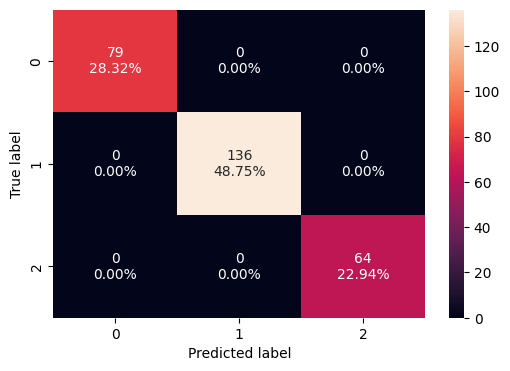

In [94]:
confusion_matrix_sklearn(rf_bow, X_train_bow, y_train_bow)

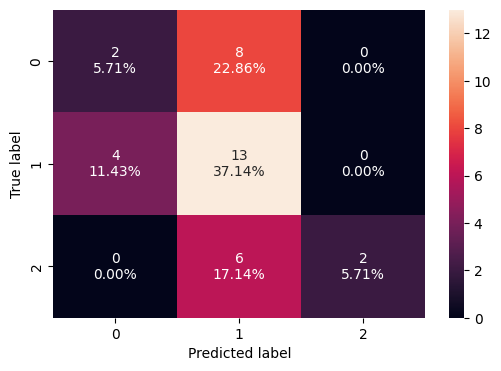

In [95]:
confusion_matrix_sklearn(rf_bow, X_valid_bow, y_valid_bow)

In [96]:
# Predicting on train data
y_pred_train_bow = rf_bow.predict(X_train_bow)

# Predicting on validation data
y_pred_valid_bow = rf_bow.predict(X_valid_bow)

**Classfication Report**

In [97]:
print(classification_report(y_train_bow, y_pred_train_bow))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        79
           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00        64

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



In [98]:
print(classification_report(y_valid_bow, y_pred_valid_bow))

              precision    recall  f1-score   support

          -1       0.33      0.20      0.25        10
           0       0.48      0.76      0.59        17
           1       1.00      0.25      0.40         8

    accuracy                           0.49        35
   macro avg       0.60      0.40      0.41        35
weighted avg       0.56      0.49      0.45        35



**Observations**
- This model acheived ~71% on recall scope in Netrual values however very low recall scope for Positive and Negative values
- Model is having challange to idetifiy postive and negative details
- This could be due to imbalance dataset (Netrual data is 2 times higher than Postivie or Negative data set

## Random Forest Model (default with Word2Vec)

In [99]:
# Building the model
rf_bow = RandomForestClassifier(random_state = 42)

# Fitting on train data
rf_bow.fit(X_train_word2vec, y_train_word2vec)

RandomForestClassifier(random_state=42)

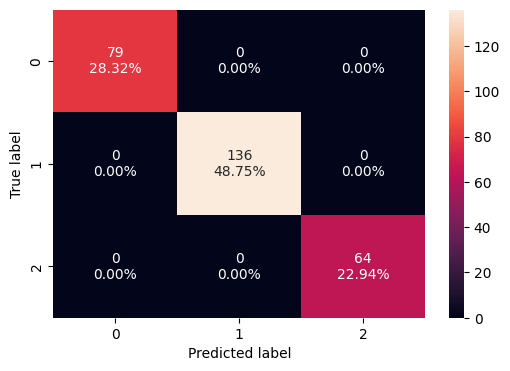

In [100]:
confusion_matrix_sklearn(rf_bow, X_train_word2vec, y_train_word2vec)

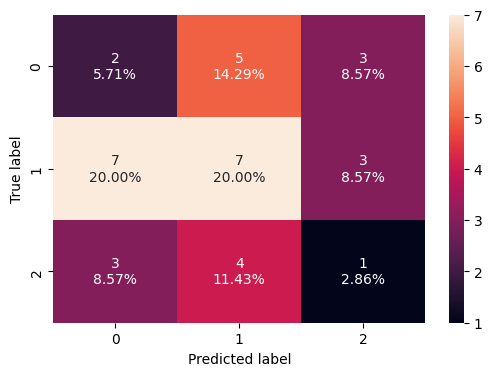

In [101]:
confusion_matrix_sklearn(rf_bow, X_valid_word2vec, y_valid_word2vec)

In [102]:
# Predicting on train data
y_pred_train_word2vec = rf_bow.predict(X_train_word2vec)

# Predicting on validation data
y_pred_valid_word2vec = rf_bow.predict(X_valid_word2vec)

**Classification Report**

In [103]:
print(classification_report(y_train_word2vec, y_pred_train_word2vec))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        79
           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00        64

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



In [104]:
print(classification_report(y_valid_word2vec, y_pred_valid_word2vec))

              precision    recall  f1-score   support

          -1       0.17      0.20      0.18        10
           0       0.44      0.41      0.42        17
           1       0.14      0.12      0.13         8

    accuracy                           0.29        35
   macro avg       0.25      0.25      0.25        35
weighted avg       0.29      0.29      0.29        35



**Observation**
- Recall scope is very poor for Postive, Negative and Netural dataset
- It failed to identify the data for most the cases, this could be due to imblance dataset

## Random Forest Model (default with GloVe)

In [105]:
# Building the model
rf_bow = RandomForestClassifier(random_state = 42)

# Fitting on train data
rf_bow.fit(X_train_glove, y_train_glove)

RandomForestClassifier(random_state=42)

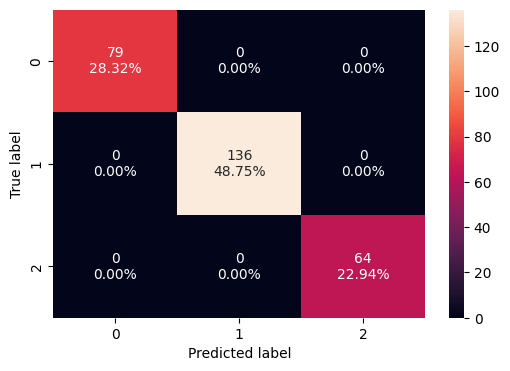

In [106]:
confusion_matrix_sklearn(rf_bow, X_train_glove, y_train_glove)

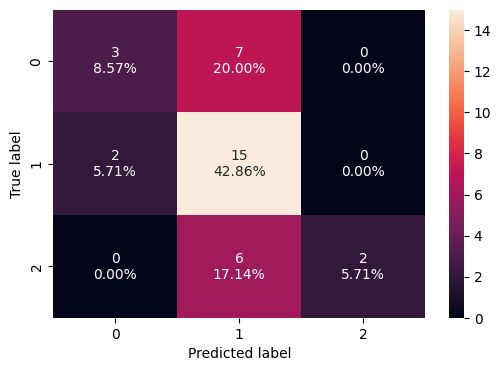

In [107]:
confusion_matrix_sklearn(rf_bow, X_valid_glove, y_valid_glove)

In [108]:
# Predicting on train data
y_pred_train_glove = rf_bow.predict(X_train_glove)

# Predicting on validation data
y_pred_valid_glove = rf_bow.predict(X_valid_glove)

**Classification Report**

In [109]:
print(classification_report(y_train_glove, y_pred_train_glove))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        79
           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00        64

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



In [110]:
print(classification_report(y_valid_glove, y_pred_valid_glove))

              precision    recall  f1-score   support

          -1       0.60      0.30      0.40        10
           0       0.54      0.88      0.67        17
           1       1.00      0.25      0.40         8

    accuracy                           0.57        35
   macro avg       0.71      0.48      0.49        35
weighted avg       0.66      0.57      0.53        35



**Observations**
- Same like above model, we are seeing similar challanges in this model
- Recall score for Netural  and postive data is very low

## Randamforest (with Default Sentence Transformer)

In [111]:
# Building the model
rf_transformer = RandomForestClassifier(n_estimators = 100, max_depth = 7, random_state = 42)

# Fitting on train data
rf_transformer.fit(X_train_sent, y_train_sent)

RandomForestClassifier(max_depth=7, random_state=42)

In [112]:
# Predicting on train data
y_pred_train_sent = rf_transformer.predict(X_train_sent)

# Predicting on test data
y_pred_valid_sent = rf_transformer.predict(X_valid_sent)

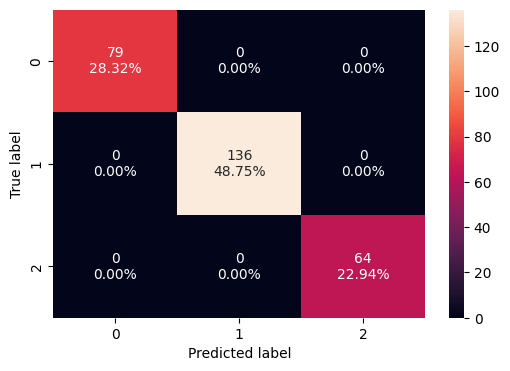

In [113]:
confusion_matrix_sklearn(rf_transformer, X_train_sent, y_train_sent)

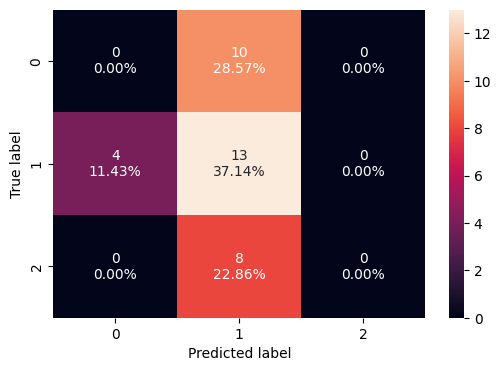

In [114]:
confusion_matrix_sklearn(rf_transformer, X_valid_sent, y_valid_sent)

**Classification Report**

In [115]:
print(classification_report(y_train_sent, y_pred_train_sent))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        79
           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00        64

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



In [116]:
print(classification_report(y_valid_sent, y_pred_valid_sent))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        10
           0       0.42      0.76      0.54        17
           1       0.00      0.00      0.00         8

    accuracy                           0.37        35
   macro avg       0.14      0.25      0.18        35
weighted avg       0.20      0.37      0.26        35



## Random Forest (with class_weights and BOW)

In [117]:
rf_bow_balanced = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_bow_balanced.fit(X_train_bow, y_train_bow)

RandomForestClassifier(class_weight='balanced', random_state=42)

**Confustion Matrix**

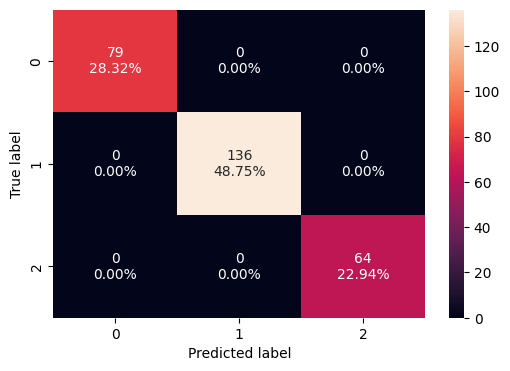

In [118]:
confusion_matrix_sklearn(rf_bow_balanced, X_train_bow, y_train_bow)

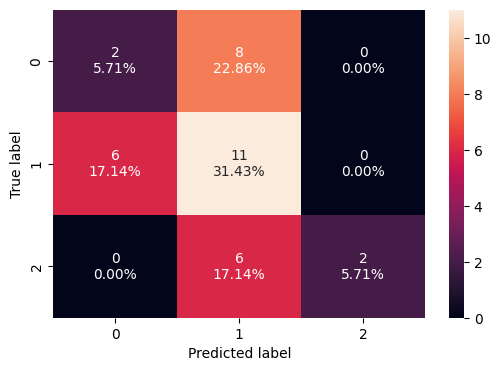

In [119]:
confusion_matrix_sklearn(rf_bow_balanced, X_valid_bow, y_valid_bow)

In [120]:
# Predicting on train data
y_pred_train_bow = rf_bow_balanced.predict(X_train_bow)

# Predicting on test data
y_pred_valid_bow = rf_bow_balanced.predict(X_valid_bow)

**Classification Report**

In [121]:
print(classification_report(y_train_bow, y_pred_train_bow))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        79
           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00        64

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



In [122]:
print(classification_report(y_valid_bow, y_pred_valid_bow))

              precision    recall  f1-score   support

          -1       0.25      0.20      0.22        10
           0       0.44      0.65      0.52        17
           1       1.00      0.25      0.40         8

    accuracy                           0.43        35
   macro avg       0.56      0.37      0.38        35
weighted avg       0.51      0.43      0.41        35



## Random Forest (with class_weights and Word2Vec)

In [123]:
rf_word2vec_balanced = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_word2vec_balanced.fit(X_train_word2vec, y_train_word2vec)

RandomForestClassifier(class_weight='balanced', random_state=42)

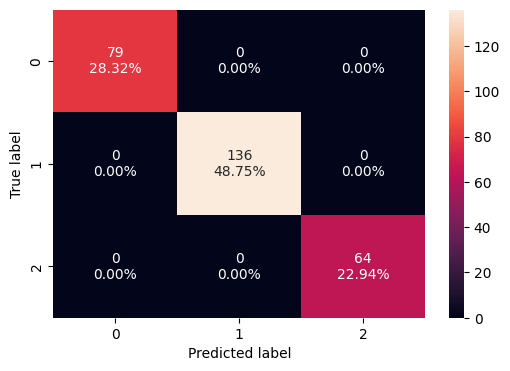

In [124]:
confusion_matrix_sklearn(rf_word2vec_balanced, X_train_word2vec, y_train_word2vec)

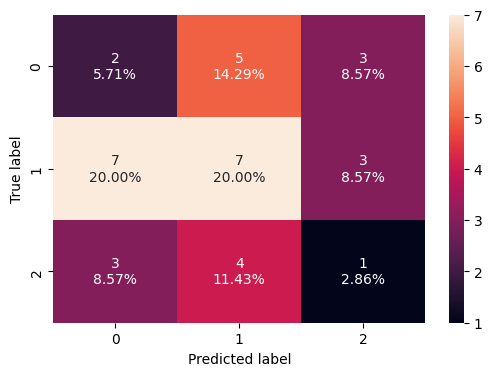

In [125]:
confusion_matrix_sklearn(rf_word2vec_balanced, X_valid_word2vec, y_valid_word2vec)

In [126]:
# Predicting on train data
y_pred_train = rf_word2vec_balanced.predict(X_train_word2vec)

# Predicting on test data
y_pred_valid = rf_word2vec_balanced.predict(X_valid_word2vec)

**Classification Report**

In [127]:
print(classification_report(y_train_word2vec, y_pred_train_word2vec))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        79
           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00        64

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



In [128]:
print(classification_report(y_valid_word2vec, y_pred_valid_word2vec))

              precision    recall  f1-score   support

          -1       0.17      0.20      0.18        10
           0       0.44      0.41      0.42        17
           1       0.14      0.12      0.13         8

    accuracy                           0.29        35
   macro avg       0.25      0.25      0.25        35
weighted avg       0.29      0.29      0.29        35



## Random Forest (with class_weights and GloVe)

In [129]:
rf_glove_balanced = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_glove_balanced.fit(X_train_glove, y_train_glove)

RandomForestClassifier(class_weight='balanced', random_state=42)

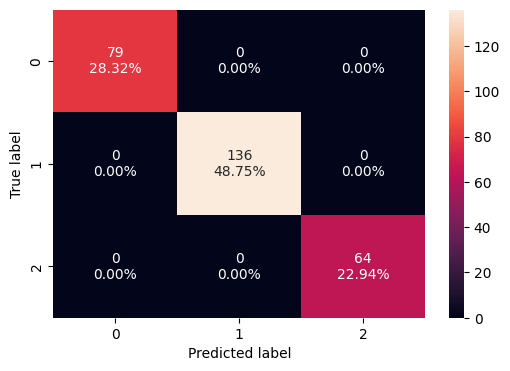

In [130]:
confusion_matrix_sklearn(rf_glove_balanced, X_train_glove, y_train_glove)

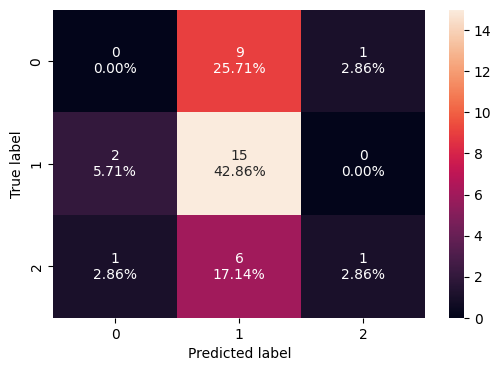

In [131]:
confusion_matrix_sklearn(rf_glove_balanced, X_valid_glove, y_valid_glove)

In [132]:
# Predicting on train data
y_pred_train = rf_glove_balanced.predict(X_train_glove)

# Predicting on test data
y_pred_valid = rf_glove_balanced.predict(X_valid_glove)

**Classification Report**

In [133]:
print(classification_report(y_train_glove, y_pred_train_glove))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        79
           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00        64

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



In [134]:
print(classification_report(y_valid_glove, y_pred_valid_glove))

              precision    recall  f1-score   support

          -1       0.60      0.30      0.40        10
           0       0.54      0.88      0.67        17
           1       1.00      0.25      0.40         8

    accuracy                           0.57        35
   macro avg       0.71      0.48      0.49        35
weighted avg       0.66      0.57      0.53        35



## Random Forest (with hyperparamter tuning and Word2Vec)

In [135]:
# Choose the type of classifier
rf_tuned = RandomForestClassifier(class_weight="balanced", random_state=42)

# defining the hyperparameter grid for tuning
parameters = {
    "max_depth": list(np.arange(4, 15, 2)),
    "max_features": ["sqrt", 0.5, 0.7],
    "min_samples_split": [5, 6, 7],
    "n_estimators": np.arange(30, 110, 200),
     "criterion": ['gini', 'entropy']
}

# defining the type of scoring used to compare parameter combinations
# we need to specify the mechanism of averaging as we have more than 2 target classes
scorer = metrics.make_scorer(metrics.recall_score, average='weighted')

# running the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3, n_jobs=-1)
grid_obj = grid_obj.fit(X_train_word2vec, y_train_word2vec)

In [136]:
# Creating a new model with the best combination of parameters
rf_word2vec_tuned = grid_obj.best_estimator_

# Fit the new model to the data
rf_word2vec_tuned.fit(X_train_word2vec, y_train_word2vec)

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_split=7, n_estimators=30, random_state=42)

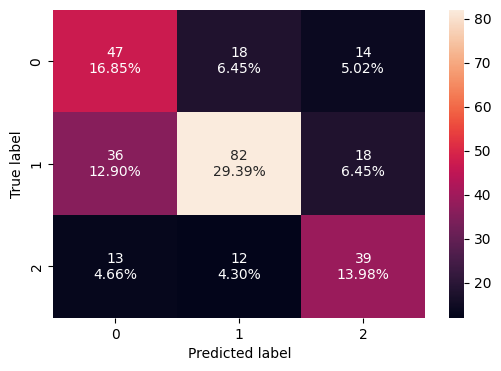

In [137]:
confusion_matrix_sklearn(rf_word2vec_tuned, X_train_word2vec, y_train_word2vec)

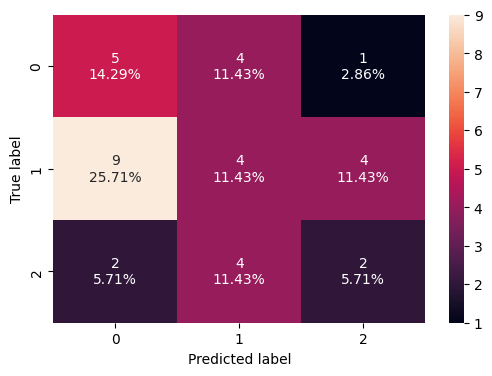

In [138]:
confusion_matrix_sklearn(rf_word2vec_tuned, X_valid_word2vec, y_valid_word2vec)

In [139]:
# Predicting on train data
y_pred_train_word2vec = rf_word2vec_tuned.predict(X_train_word2vec)

# Predicting on validation data
y_pred_valid_word2vec = rf_word2vec_tuned.predict(X_valid_word2vec)

**Classification Report**

In [140]:
print(classification_report(y_train_word2vec, y_pred_train_word2vec))

              precision    recall  f1-score   support

          -1       0.49      0.59      0.54        79
           0       0.73      0.60      0.66       136
           1       0.55      0.61      0.58        64

    accuracy                           0.60       279
   macro avg       0.59      0.60      0.59       279
weighted avg       0.62      0.60      0.61       279



In [141]:
print(classification_report(y_valid_word2vec, y_pred_valid_word2vec))

              precision    recall  f1-score   support

          -1       0.31      0.50      0.38        10
           0       0.33      0.24      0.28        17
           1       0.29      0.25      0.27         8

    accuracy                           0.31        35
   macro avg       0.31      0.33      0.31        35
weighted avg       0.32      0.31      0.30        35



## Use Oversampling Data

In [167]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE( k_neighbors=5, random_state=1)
X_train_over_w2v, y_train_over_w2v = sm.fit_resample(X_train_word2vec, y_train_word2vec)

In [168]:
# Creating a new model with the best combination of parameters
rf_word2vec_tuned = grid_obj.best_estimator_

# Fit the new model to the data
rf_word2vec_tuned.fit(X_train_over_w2v, y_train_over_w2v)

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_split=7, n_estimators=30, random_state=42)

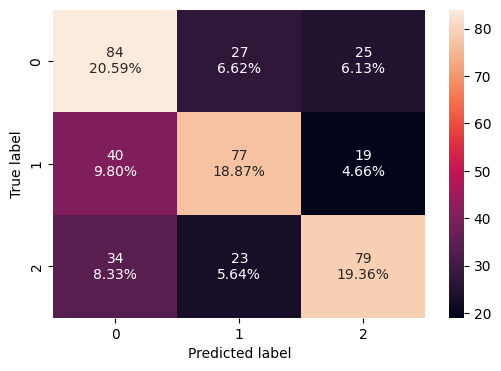

In [169]:
confusion_matrix_sklearn(rf_word2vec_tuned, X_train_over_w2v, y_train_over_w2v)

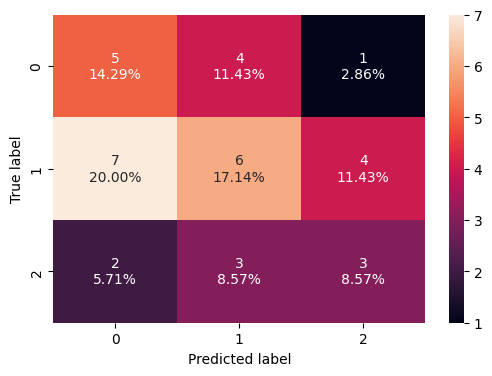

In [170]:
confusion_matrix_sklearn(rf_word2vec_tuned, X_valid_word2vec, y_valid_word2vec)

In [171]:
# Predicting on train data
y_pred_train_word2vec1 = rf_word2vec_tuned.predict(X_train_over_w2v)

In [172]:
# Predicting on validation data
y_pred_valid_word2vec1 = rf_word2vec_tuned.predict(X_valid_word2vec)

In [173]:
print(classification_report(y_train_over_w2v, y_pred_train_word2vec1))

              precision    recall  f1-score   support

          -1       0.53      0.62      0.57       136
           0       0.61      0.57      0.59       136
           1       0.64      0.58      0.61       136

    accuracy                           0.59       408
   macro avg       0.59      0.59      0.59       408
weighted avg       0.59      0.59      0.59       408



In [174]:
print(classification_report(y_valid_word2vec, y_pred_valid_word2vec1))

              precision    recall  f1-score   support

          -1       0.36      0.50      0.42        10
           0       0.46      0.35      0.40        17
           1       0.38      0.38      0.38         8

    accuracy                           0.40        35
   macro avg       0.40      0.41      0.40        35
weighted avg       0.41      0.40      0.40        35



## Random Forest (with hyperparametertuning and GloVe)

In [180]:
# Choose the type of classifier
rf_tuned = RandomForestClassifier(class_weight="balanced", random_state=42)

# defining the hyperparameter grid for tuning
parameters = {
    "max_depth": list(np.arange(4, 15, 2)),
    "max_features": ["sqrt", 0.5, 0.7],
    "min_samples_split": [5, 6, 7],
    "n_estimators": np.arange(30, 110, 200),
     "criterion": ['gini', 'entropy']
}

# defining the type of scoring used to compare parameter combinations
# we need to specify the mechanism of averaging as we have more than 2 target classes
scorer = metrics.make_scorer(metrics.recall_score, average='weighted')

# running the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,  cv=3, n_jobs=-1)
grid_obj = grid_obj.fit(X_train_glove, y_train_glove)

In [181]:
# Creating a new model with the best combination of parameters
rf_glove_tuned = grid_obj.best_estimator_

# Fit the new model to the data
rf_glove_tuned.fit(X_train_glove, y_train_glove)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=7, n_estimators=30, random_state=42)

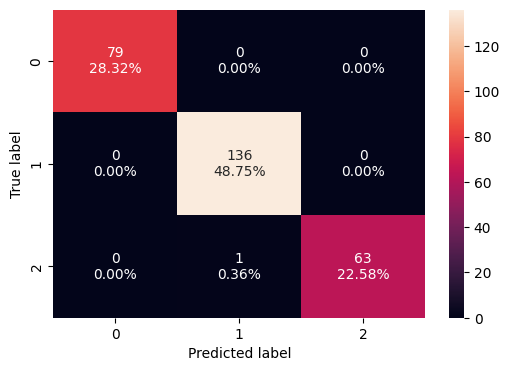

In [182]:
#Printing the confusion matrix
confusion_matrix_sklearn(rf_glove_tuned, X_train_glove, y_train_glove)

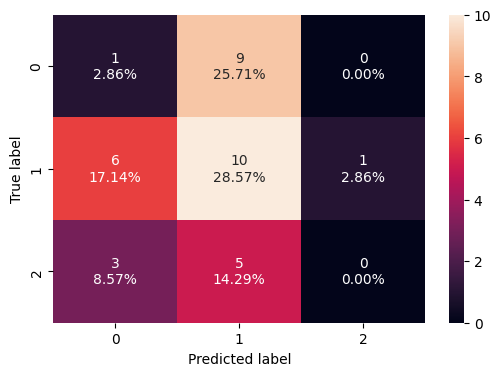

In [183]:
#Printing the confusion matrix
confusion_matrix_sklearn(rf_glove_tuned, X_valid_glove, y_valid_glove)

In [184]:
# Predicting on train data
y_pred_train_glove = rf_glove_tuned.predict(X_train_glove)

# Predicting on validation data
y_pred_valid_glove = rf_glove_tuned.predict(X_valid_glove)

**Classification Report**

In [185]:
#Printing
print(classification_report(y_train_glove, y_pred_train_glove))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        79
           0       0.99      1.00      1.00       136
           1       1.00      0.98      0.99        64

    accuracy                           1.00       279
   macro avg       1.00      0.99      1.00       279
weighted avg       1.00      1.00      1.00       279



In [186]:
print(classification_report(y_valid_glove, y_pred_valid_glove))

              precision    recall  f1-score   support

          -1       0.10      0.10      0.10        10
           0       0.42      0.59      0.49        17
           1       0.00      0.00      0.00         8

    accuracy                           0.31        35
   macro avg       0.17      0.23      0.20        35
weighted avg       0.23      0.31      0.27        35



## Oversampling Data

In [178]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE( k_neighbors=5, random_state=1)
X_train_over_glove, y_train_over_glove = sm.fit_resample(X_train_glove, y_train_glove)

In [179]:
# Creating a new model with the best combination of parameters
rf_glove_tuned = grid_obj.best_estimator_

# Fit the new model to the data
rf_glove_tuned.fit(X_train_over_glove, y_train_over_glove)

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_split=7, n_estimators=30, random_state=42)

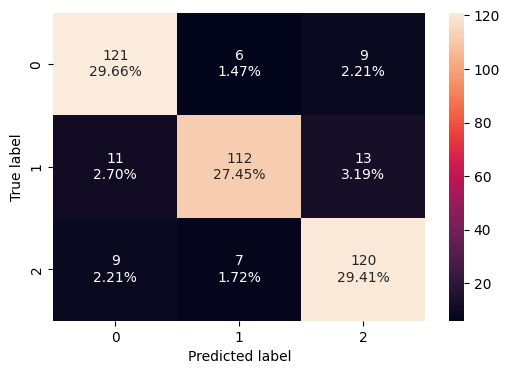

In [181]:
confusion_matrix_sklearn(rf_glove_tuned, X_train_over_glove, y_train_over_glove)

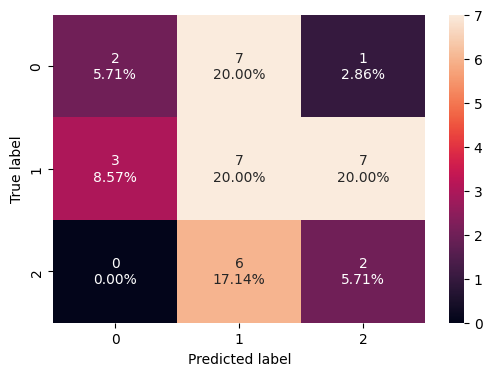

In [182]:
confusion_matrix_sklearn(rf_glove_tuned, X_valid_glove, y_valid_glove)

In [183]:
# Predicting on train data
y_pred_train_glove1 = rf_word2vec_tuned.predict(X_train_over_glove)

In [184]:
# Predicting on validation data
y_pred_valid_glove1 = rf_word2vec_tuned.predict(X_valid_glove)

In [185]:
print(classification_report(y_train_over_glove, y_pred_train_glove1))

              precision    recall  f1-score   support

          -1       0.86      0.89      0.87       136
           0       0.90      0.82      0.86       136
           1       0.85      0.88      0.86       136

    accuracy                           0.87       408
   macro avg       0.87      0.87      0.87       408
weighted avg       0.87      0.87      0.87       408



In [186]:
print(classification_report(y_valid_glove, y_pred_valid_glove1))

              precision    recall  f1-score   support

          -1       0.40      0.20      0.27        10
           0       0.35      0.41      0.38        17
           1       0.20      0.25      0.22         8

    accuracy                           0.31        35
   macro avg       0.32      0.29      0.29        35
weighted avg       0.33      0.31      0.31        35



## Sentiment Analysis - Pre-trained Model

In [152]:
sentiment_hf = pipeline("sentiment-analysis") # this uses the HF default sentiment analysis model

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [153]:
trial_data = ["I love this movie", "This movie is not very good at all!",'There is a cat outside.']
sentiment_hf(trial_data)

[{'label': 'POSITIVE', 'score': 0.9998766183853149},
 {'label': 'NEGATIVE', 'score': 0.9998003840446472},
 {'label': 'NEGATIVE', 'score': 0.6246477961540222}]

In [154]:
hf_review_dict = sentiment_hf(stock['Final_cleaned_News'].to_list(),truncation=True)

In [155]:
hf_review_dict

[{'label': 'NEGATIVE', 'score': 0.9985822439193726},
 {'label': 'NEGATIVE', 'score': 0.9959476590156555},
 {'label': 'NEGATIVE', 'score': 0.9963493347167969},
 {'label': 'NEGATIVE', 'score': 0.9958374500274658},
 {'label': 'NEGATIVE', 'score': 0.9953169822692871},
 {'label': 'NEGATIVE', 'score': 0.9928777813911438},
 {'label': 'NEGATIVE', 'score': 0.9959331154823303},
 {'label': 'NEGATIVE', 'score': 0.996798574924469},
 {'label': 'NEGATIVE', 'score': 0.9984049201011658},
 {'label': 'NEGATIVE', 'score': 0.9963841438293457},
 {'label': 'NEGATIVE', 'score': 0.9980081915855408},
 {'label': 'NEGATIVE', 'score': 0.9988628625869751},
 {'label': 'NEGATIVE', 'score': 0.997477114200592},
 {'label': 'NEGATIVE', 'score': 0.9968745708465576},
 {'label': 'NEGATIVE', 'score': 0.9956692457199097},
 {'label': 'NEGATIVE', 'score': 0.9910807013511658},
 {'label': 'NEGATIVE', 'score': 0.9700759053230286},
 {'label': 'NEGATIVE', 'score': 0.9971801042556763},
 {'label': 'NEGATIVE', 'score': 0.99207627773284

In [156]:
hf_review_sent = [0]*len(stock['Final_cleaned_News'])
for News in range(len(stock['Final_cleaned_News'])):
  if hf_review_dict[News]['label']=='POSITIVE':
    hf_review_sent[News] = 1

In [157]:
# creating a function to plot the confusion matrix
def plot_confusion_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (5, 4))
    label_list = [0, 1]
    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = label_list, yticklabels = label_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

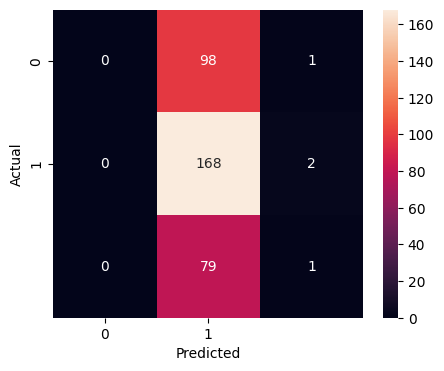

In [158]:
plot_confusion_matrix(y, hf_review_sent)

### Model Testing

We'll check the performance of the tuned RF model with BOW vectors on the test set.

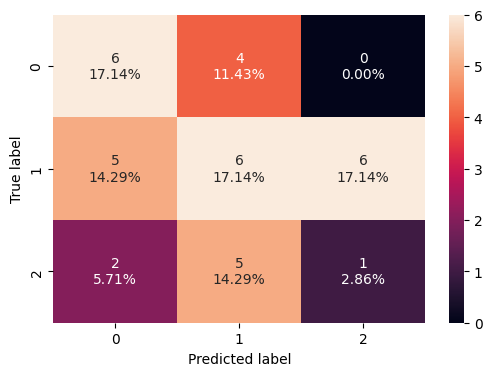

In [187]:
# Now, use this transformed data for prediction:
confusion_matrix_sklearn(rf_glove_tuned, X_test_glove, y_test_glove)

In [188]:
# Predicting on test data
y_pred_test_glove = rf_glove_tuned.predict(X_test_glove)

In [189]:
print(classification_report(y_test_glove, y_pred_test_glove))

              precision    recall  f1-score   support

          -1       0.46      0.60      0.52        10
           0       0.40      0.35      0.38        17
           1       0.14      0.12      0.13         8

    accuracy                           0.37        35
   macro avg       0.33      0.36      0.34        35
weighted avg       0.36      0.37      0.36        35



## **Weekly News Summarization**

**Important Note**: It is recommended to run this section of the project independently from the previous sections in order to avoid runtime crashes due to RAM overload.

#### Installing and Importing the necessary libraries

In [ ]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
#!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python -q

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 MB 13.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.6 MB/s eta 0:00:00


In [ ]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the library for data manipulation
import pandas as pd

from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()

#### Loading the Model

In [ ]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"


In [ ]:
# Using hf_hub_download to download a model from the Hugging Face model hub
# The repo_id parameter specifies the model name or path in the Hugging Face repository
# The filename parameter specifies the name of the file to download
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

In [ ]:
llm = Llama(
    model_path=model_path,
    n_ctx=2048,
)

llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from /root/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/mistral-7b-instruct-v0.2.Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loade

**Defining Model Response Parameters**

In [ ]:
#Defining the response funciton for Task 1.
def response_1(prompt,review):
    model_output = llm(
      f"""
      Q: {prompt}
      Review: {review}
      A:
      """,
      max_tokens=32,
      stop=["Q:", "\n"],
      temperature=0.01,
      echo=False,
    )

    temp_output = model_output["choices"][0]["text"]

    return temp_output

In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_sentiment = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_sentiment)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

#### Aggregating the data weekly

In [ ]:
stock["Date"] = pd.to_datetime(stock['Date'])  # Convert the 'Date' column to datetime format.

In [ ]:
# Group the data by week using the 'Date' column.
weekly_grouped = stock.groupby(pd.Grouper(key='Date', freq='W'))

In [ ]:
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

(18, 2)


In [ ]:
weekly_grouped

,Date,News
0,2019-01-06,The tech sector experienced a significant dec...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...
2,2019-01-20,The U.S. stock market declined on Monday as c...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre..."
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...
5,2019-02-10,"The Dow Jones Industrial Average, S&P 500, an..."
6,2019-02-17,"This week, the European Union's second highes..."
7,2019-02-24,This news article discusses progress towards ...
8,2019-03-03,The Dow Jones Industrial Average and other ma...
9,2019-03-10,"Spotify, the world's largest paid music strea..."


In [ ]:
i = 2
print(weekly_grouped.loc[i, 'News'])

 The U.S. stock market declined on Monday as concerns over a global economic slowdown intensified following unexpected drops in China's exports and imports, with tech stocks suffering the most significant losses. The Philadelphia SE Semiconductor Index fell 1.6 percent, while the technology sector dropped 0.9 percent, dragging down the ||  The weak Chinese trade data led to a halt in Europe's four-day stock market rally on Monday, with technology and luxury goods sectors bearing the brunt of selling. Luxury retailers, including LVMH, Hermes, Kering, Moncler, and Pandora, dropped between 1% and 7%, while Bur ||  The Chinese auto market experienced its first contraction since the 1990s in 2018, with sales falling 2.8 percent to 28.1 million vehicles due to the phasing out of purchase tax cuts on smaller cars and the US-China trade war. Companies like Ford and Jaguar Land R ||  Dialog Semiconductor reported fourth quarter revenue in line with guidance despite a decrease in iPhone sales at

#### Summarization

**Note**:

- The model is expected to summarize the news from the week by identifying the top three positive and negative events that are most likely to impact the price of the stock.

- As an output, the model is expected to return a JSON containing two keys, one for Positive Events and one for Negative Events.

For the project, we need to define the prompt to be fed to the LLM to help it understand the task to perform. The following should be the components of the prompt:

1. **Role**: Specifies the role the LLM will be taking up to perform the specified task, along with any specific details regarding the role

  - **Example**: `You are an expert data analyst specializing in news content analysis.`

2. **Task**: Specifies the task to be performed and outlines what needs to be accomplished, clearly defining the objective

  - **Example**: `Analyze the provided news headline and return the main topics contained within it.`

3. **Instructions**: Provides detailed guidelines on how to perform the task, which includes steps, rules, and criteria to ensure the task is executed correctly

  - **Example**:

```
Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.
```

4. **Output Format**: Specifies the format in which the final response should be structured, ensuring consistency and clarity in the generated output

  - **Example**: `Return the output in JSON format with keys as the topic number and values as the actual topic.`

**Full Prompt Example**:

```
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
```

**Sample Output**:

`{"1": "Politics", "2": "Economy", "3": "Health" }`

##### Utility Functions

##### Defining the response function

In [ ]:
#Defining the response funciton for Task 1.
def response_1(prompt,review):
    model_output = llm(
      f"""
      Q: {prompt}
      Review: {review}
      A:
      """,
      max_tokens=32,
      stop=["Q:", "\n"],
      temperature=0.01,
      echo=False,
    )

    temp_output = model_output["choices"][0]["text"]

    return temp_output

In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_sentiment = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_sentiment)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

##### Checking the model output on a sample

**Note**: Use this section to test out the prompt with one instance before using it for the entire weekly data.

##### Checking the model output on the weekly data

## Sentiment Analysis

In [ ]:
# creating a copy of the data
data_3 = weekly_grouped.copy()

In [ ]:
def response_2(prompt, review):
    # **Encode the prompt as bytes before tokenization**
    # Reserve 100 tokens for output and 64 for instruction, dynamic review length
    # Reduce reserved tokens to accommodate longer reviews
    max_review_tokens = max(0, 1024 - len(llm.tokenize(prompt.encode('utf-8'))) - 32 - 100)

    # Truncate the review to fit the calculated max_review_tokens
    truncated_review = ' '.join(review.split()[:max_review_tokens])

    model_output = llm(
        f"""
        Q: {prompt}
        review: {truncated_review}
        A:
        """,
        max_tokens=64,  # Keep output tokens reasonable
        stop=["Q:", "\n"],
        temperature=0.01,
        echo=False,
    )

    temp_output = model_output["choices"][0]["text"]

    # Check if '{' is present before slicing
    if '{' in temp_output:
        final_output = temp_output[temp_output.index('{'):]
    else:
        # Handle the case where '{' is not found
        print(f"Warning: JSON object not found in model output: {temp_output}")
        final_output = ""

    return final_output

In [ ]:
# defining the instructions for the model
instruction_3 = """
    You are an expert data analyst specializing in news content analysis.

    Instructions:
    Your goal is to identify either top 3 positive news or 3 negative news mentioned namely which are most likely to impact the price of the stock. Also, identify overall all sentiments of the news.
    1. Overall - Either 'Postivie' or 'Negative' or 'Netural'
    2. Top 3 Postive News
    3. Top 3 Negative news


  Return the output in the below format, if any issue to return in below format, send the response with colon post after Overall or Top 3 Postive News or Top 3 Negative news and put semicolon after your_sentiment_prediction:
    {
        "Overall": "your_sentiment_prediction",
        "Top 3 Postive News": "your_sentiment_prediction",
        "Top 3 Negative news": "your_sentiment_prediction",
    }

  In case one of the three aspects is not mentioned in the review, return "Not Applicable" (including quotes) for the corresponding key value.

"""

In [ ]:
data_3['model_response'] = weekly_grouped[['News']].apply(lambda x: response_2(instruction_3, x[0]),axis=1)

llama_perf_context_print:        load time =  801783.60 ms
llama_perf_context_print: prompt eval time =       0.00 ms /  1198 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  803230.24 ms /  1199 tokens
Llama.generate: 271 prefix-match hit, remaining 933 prompt tokens to eval
llama_perf_context_print:        load time =  801783.60 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   933 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  616112.10 ms /   934 tokens
Llama.generate: 271 prefix-match hit, remaining 916 prompt tokens to eval
llama_perf_context_print:        load time =  801783.60 ms
llama_perf_context_prin

llama_perf_context_print:        load time =  801783.60 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   562 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  357493.81 ms /   563 tokens
Llama.generate: 271 prefix-match hit, remaining 644 prompt tokens to eval
llama_perf_context_print:        load time =  801783.60 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   644 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  431730.00 ms /   645 tokens
Llama.generate: 271 prefix-match hit, remaining 714 prompt tokens to eval


llama_perf_context_print:        load time =  801783.60 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   714 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  470815.49 ms /   715 tokens
Llama.generate: 271 prefix-match hit, remaining 891 prompt tokens to eval
llama_perf_context_print:        load time =  801783.60 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   891 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  578701.62 ms /   892 tokens
Llama.generate: 271 prefix-match hit, remaining 923 prompt tokens to eval


llama_perf_context_print:        load time =  801783.60 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   923 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  607723.71 ms /   924 tokens
Llama.generate: 271 prefix-match hit, remaining 919 prompt tokens to eval
llama_perf_context_print:        load time =  801783.60 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   919 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  605939.03 ms /   920 tokens
Llama.generate: 271 prefix-match hit, remaining 857 prompt tokens to eval
llama_perf_context_print:        load time =  801783.60 ms
llama_perf_context_prin

In [ ]:
data_3['model_response'].values

array(['{', '{', '{', '{', '{', '{', '', '{', '', '{', '', '{', '{', '{',
       '{', '{', '{', '{'], dtype=object)

In [ ]:
i = 2
print(data_3.loc[i, 'News'])

 The U.S. stock market declined on Monday as concerns over a global economic slowdown intensified following unexpected drops in China's exports and imports, with tech stocks suffering the most significant losses. The Philadelphia SE Semiconductor Index fell 1.6 percent, while the technology sector dropped 0.9 percent, dragging down the ||  The weak Chinese trade data led to a halt in Europe's four-day stock market rally on Monday, with technology and luxury goods sectors bearing the brunt of selling. Luxury retailers, including LVMH, Hermes, Kering, Moncler, and Pandora, dropped between 1% and 7%, while Bur ||  The Chinese auto market experienced its first contraction since the 1990s in 2018, with sales falling 2.8 percent to 28.1 million vehicles due to the phasing out of purchase tax cuts on smaller cars and the US-China trade war. Companies like Ford and Jaguar Land R ||  Dialog Semiconductor reported fourth quarter revenue in line with guidance despite a decrease in iPhone sales at

In [ ]:
print(data_3.loc[i, 'model_response'])

{


In [ ]:
# applying the function to the model response
data_3['model_response_parsed'] = data_3['model_response'].apply(extract_json_data)
data_3['model_response_parsed']

,model_response_parsed
0,{}
1,{}
2,{}
3,{}
4,{}
5,{}
6,{}
7,{}
8,{}
9,{}


In [ ]:
model_response_parsed_df_3 = pd.json_normalize(data_3['model_response_parsed'])
model_response_parsed_df_3

""
0
1
2
3
4
5
6
7
8
9


In [ ]:
model_response_parsed_df_3 = model_response_parsed_df_3.apply(lambda x: x.astype(str).str.lower())

In [ ]:
data_with_parsed_model_output_3 = pd.concat([data_3, model_response_parsed_df_3], axis=1)
data_with_parsed_model_output_3.head()

,Date,News,model_response,model_response_parsed
0,2019-01-06,The tech sector experienced a significant dec...,{,{}
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...,{,{}
2,2019-01-20,The U.S. stock market declined on Monday as c...,{,{}
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre...",{,{}
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...,{,{}


In [ ]:
final_data_3 = data_with_parsed_model_output_3.drop(['model_response','model_response_parsed'], axis=1)
final_data_3.head()

,Date,News
0,2019-01-06,The tech sector experienced a significant dec...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...
2,2019-01-20,The U.S. stock market declined on Monday as c...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre..."
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...


In [ ]:
final_data_3['Overall'].value_counts()

KeyError: 'Overall'

##### Formatting the model output

## **Conclusions and Recommendations**

-




<font size=6 color='blue'>Power Ahead</font>
___